<a href="https://colab.research.google.com/github/Memento2121/SeaStateForcastDL/blob/main/(336%2C24)_M6_Best_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Choose Window Sizes, Models, Dataset, Target

In [ ]:
# Context and Forected windows

context_seq_size = int(336)
forecasted_seq_size = int(24)

print("Context window size:", context_seq_size)
print("Forecasted window size:", forecasted_seq_size)

# ------------------------------------------ #
# Models to Train :

PatchTST_Train = True
TCN_Train = True
LSTM_Train = True
EncoderOnlyTST_Train = False
XGBoost_Train = True
PatchTSTSelfRep_Train = False
SegRNN_Train = True

# ------------------------------------------ #
# Select Dataset

select_dataset = "M6_buoy"
#select_dataset = "Weather"

# ------------------------------------------ #
# Select Downsampling

downsampling = False
#downsampling = True

# ------------------------------------------ #
# Select Target Column

if select_dataset == "M6_buoy" :
  #tar_col ='AtmosphericPressure'
  #tar_col ='WindDirection'
  #tar_col ='WindSpeed'
  tar_col ='WaveHeight'
  # Select if Select only few columns as features
  #selected_columns = ['time', 'WaveHeight', 'WavePeriod', 'Gust', 'WindDirection', 'WindSpeed']  # Worst results (~0.55 uni, SegRNN)
  #selected_columns = ['time', 'WaveHeight', 'WavePeriod'] # Best Results (~0.38 uni, SegRNN)
  selected_columns = ['time', 'WaveHeight']
  drop_columns = True
  #drop_columns = False
  # multi is the opposite of drop_columns
  multi = False
  #multi = True

# ------------------------------------------ #
# Select if rescale data

rescale_data = True
#rescale_data = False

if select_dataset == "Weather" :
  tar_col ='Tpot (K)'
  drop_columns = False
  #multi = True
  multi = False

Context window size: 336
Forecasted window size: 24


# Weather Benchmak Dataset



In [ ]:
import pandas as pd

# Dataset URL (CSV format)
url = "https://raw.githubusercontent.com/Memento2121/SeaStateForcastDL/main/data/weather.csv"
# Load data
df = pd.read_csv(url)

display(df.head())

,date,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),OT
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45,428.1
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51,428.0
2,2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,...,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60,427.6
3,2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,...,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70,430.0
4,2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,...,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81,432.2


In [ ]:
display(df.info())

display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52696 entries, 0 to 52695
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  52696 non-null  object 
 1   p (mbar)              52696 non-null  float64
 2   T (degC)              52696 non-null  float64
 3   Tpot (K)              52696 non-null  float64
 4   Tdew (degC)           52696 non-null  float64
 5   rh (%)                52696 non-null  float64
 6   VPmax (mbar)          52696 non-null  float64
 7   VPact (mbar)          52696 non-null  float64
 8   VPdef (mbar)          52696 non-null  float64
 9   sh (g/kg)             52696 non-null  float64
 10  H2OC (mmol/mol)       52696 non-null  float64
 11  rho (g/m**3)          52696 non-null  float64
 12  wv (m/s)              52696 non-null  float64
 13  max. wv (m/s)         52696 non-null  float64
 14  wd (deg)              52696 non-null  float64
 15  rain (mm)          

None

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),OT
count,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,...,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000
mean,989.989233,10.818241,284.796938,5.409105,72.487133,14.487046,9.676828,4.810131,6.111159,9.782341,...,1.995935,3.632807,176.850276,0.011773,25.907469,131.331822,259.863438,308.601939,21.515206,417.798615
std,9.207149,7.468671,7.616995,5.956722,19.230260,7.632960,4.023504,5.539320,2.561536,4.082684,...,43.596931,2.462467,81.194840,0.123289,111.503420,215.735116,422.786515,569.956762,7.790620,321.570015
min,955.580000,-6.440000,266.190000,-13.810000,21.160000,3.770000,2.090000,0.000000,1.300000,2.090000,...,-9999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000,6.900000,-9999.000000
25%,984.800000,4.590000,278.550000,0.777500,58.820000,8.480000,6.460000,1.170000,4.070000,6.530000,...,1.000000,1.770000,141.100000,0.000000,0.000000,0.000000,0.000000,0.000000,15.240000,415.500000
50%,990.920000,10.230000,284.320000,5.260000,75.400000,12.480000,8.890000,2.740000,5.610000,8.990000,...,1.770000,3.000000,195.500000,0.000000,0.000000,2.820000,9.670000,13.120000,20.440000,423.200000
75%,995.930000,16.180000,290.260000,9.700000,87.900000,18.420000,12.050000,6.440000,7.620000,12.200000,...,2.920000,4.850000,226.700000,0.000000,0.000000,182.900000,366.437500,434.260000,26.822500,437.100000
max,1020.070000,34.800000,309.130000,20.500000,100.000000,55.670000,24.160000,42.100000,15.400000,24.530000,...,13.770000,22.900000,360.000000,11.200000,600.000000,1115.290000,2131.760000,2498.940000,49.090000,524.200000


In [ ]:
# Change date to the right format

df['time'] = pd.to_datetime(df['date'])
df = df.drop(columns=['date'])

# make the time column first

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

display(df.head())

,time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),OT
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45,428.1
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51,428.0
2,2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,...,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60,427.6
3,2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,...,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70,430.0
4,2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,...,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81,432.2


In [ ]:
display(df.info())

display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52696 entries, 0 to 52695
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  52696 non-null  datetime64[ns]
 1   p (mbar)              52696 non-null  float64       
 2   T (degC)              52696 non-null  float64       
 3   Tpot (K)              52696 non-null  float64       
 4   Tdew (degC)           52696 non-null  float64       
 5   rh (%)                52696 non-null  float64       
 6   VPmax (mbar)          52696 non-null  float64       
 7   VPact (mbar)          52696 non-null  float64       
 8   VPdef (mbar)          52696 non-null  float64       
 9   sh (g/kg)             52696 non-null  float64       
 10  H2OC (mmol/mol)       52696 non-null  float64       
 11  rho (g/m**3)          52696 non-null  float64       
 12  wv (m/s)              52696 non-null  float64       
 13  max. wv (m/s)   

None

,time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),OT
count,52696,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,...,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000
mean,2020-07-02 00:11:52.198269440,989.989233,10.818241,284.796938,5.409105,72.487133,14.487046,9.676828,4.810131,6.111159,...,1.995935,3.632807,176.850276,0.011773,25.907469,131.331822,259.863438,308.601939,21.515206,417.798615
min,2020-01-01 00:10:00,955.580000,-6.440000,266.190000,-13.810000,21.160000,3.770000,2.090000,0.000000,1.300000,...,-9999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000,6.900000,-9999.000000
25%,2020-04-01 11:47:30,984.800000,4.590000,278.550000,0.777500,58.820000,8.480000,6.460000,1.170000,4.070000,...,1.000000,1.770000,141.100000,0.000000,0.000000,0.000000,0.000000,0.000000,15.240000,415.500000
50%,2020-07-02 00:45:00,990.920000,10.230000,284.320000,5.260000,75.400000,12.480000,8.890000,2.740000,5.610000,...,1.770000,3.000000,195.500000,0.000000,0.000000,2.820000,9.670000,13.120000,20.440000,423.200000
75%,2020-10-01 12:22:30,995.930000,16.180000,290.260000,9.700000,87.900000,18.420000,12.050000,6.440000,7.620000,...,2.920000,4.850000,226.700000,0.000000,0.000000,182.900000,366.437500,434.260000,26.822500,437.100000
max,2021-01-01 00:00:00,1020.070000,34.800000,309.130000,20.500000,100.000000,55.670000,24.160000,42.100000,15.400000,...,13.770000,22.900000,360.000000,11.200000,600.000000,1115.290000,2131.760000,2498.940000,49.090000,524.200000
std,NaN,9.207149,7.468671,7.616995,5.956722,19.230260,7.632960,4.023504,5.539320,2.561536,...,43.596931,2.462467,81.194840,0.123289,111.503420,215.735116,422.786515,569.956762,7.790620,321.570015


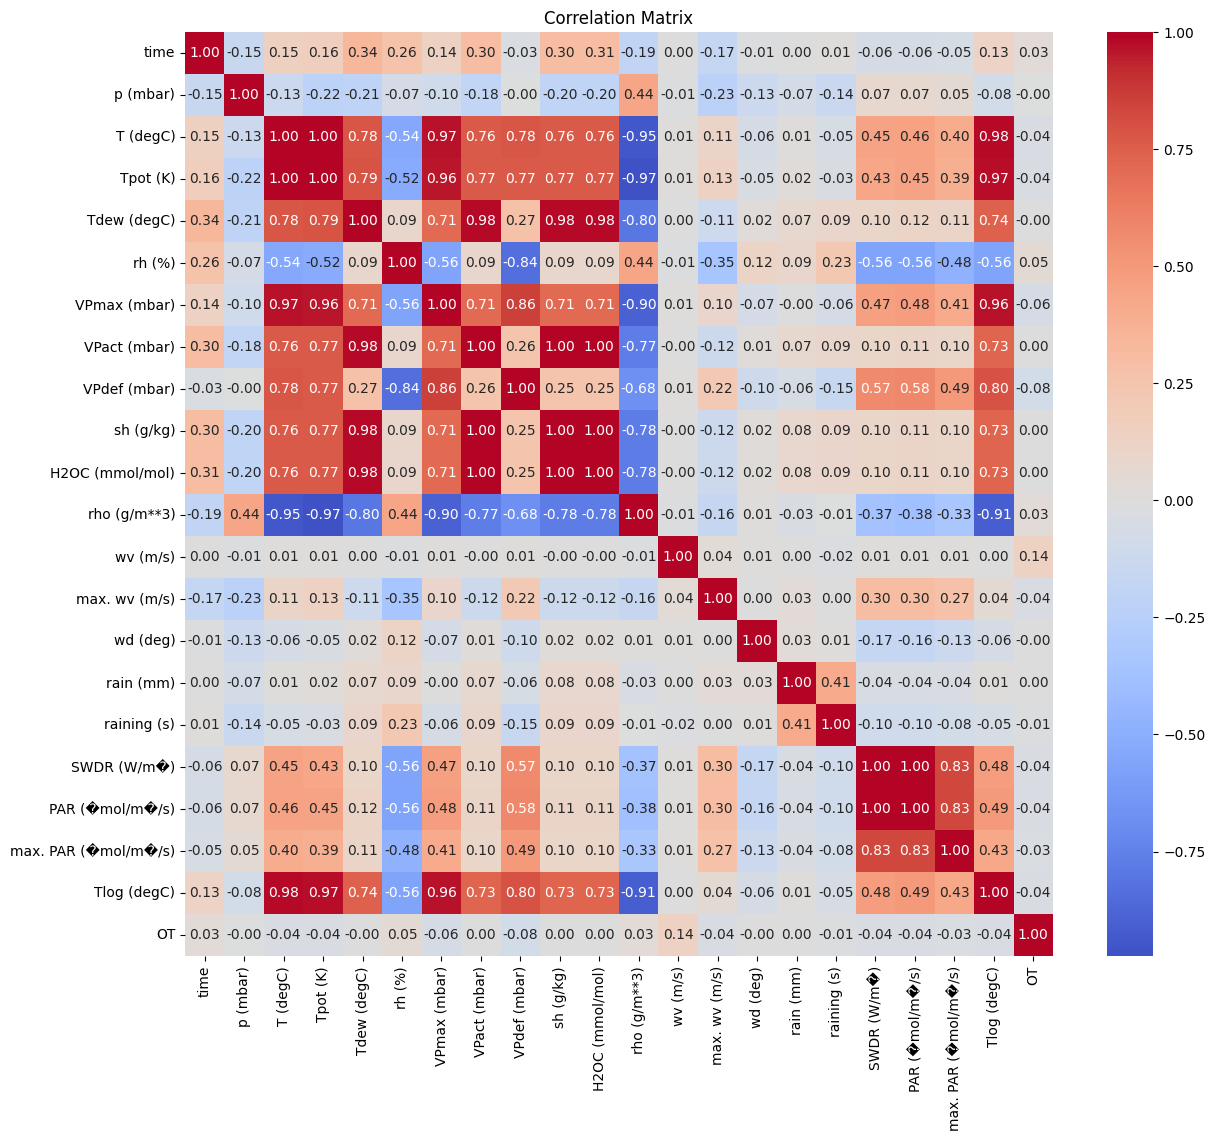

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
Weather_df = df.copy()

# M6_Buoy Dataset

## Visualization

In [ ]:
import pandas as pd

# Dataset URL (CSV format, for station_id = "M6")
url = "https://erddap.marine.ie/erddap/tabledap/IWBNetwork.csv?station_id%2CCallSign%2Clongitude%2Clatitude%2Ctime%2CAtmosphericPressure%2CWindDirection%2CWindSpeed%2CGust%2CWaveHeight%2CWavePeriod%2CMeanWaveDirection%2CHmax%2CAirTemperature%2CDewPoint%2CSeaTemperature%2Csalinity%2CRelativeHumidity%2CSprTp%2CThTp%2CTp%2CQC_Flag&station_id=%22M6%22"

# Load data
df = pd.read_csv(url)

# Ensure the 'time' column is in datetime format
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Show first few rows
print("🔍 Preview of the dataset:")
display(df.head())

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Show shape of the data
print(f"\n📊 Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Show column names and types
print("\n🧾 Column names and data types:")
print(df.dtypes)


<ipython-input-8-c3362e222a16>:7: DtypeWarning: Columns (2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)
<ipython-input-8-c3362e222a16>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'], errors='coerce')


🔍 Preview of the dataset:


,station_id,CallSign,longitude,latitude,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,...,Hmax,AirTemperature,DewPoint,SeaTemperature,salinity,RelativeHumidity,SprTp,ThTp,Tp,QC_Flag
0,NaN,NaN,degrees_east,degrees_north,NaT,millibars,degrees true,knots,knots,meters,...,meters,degrees_C,degrees_C,degrees_C,dimensionless,percent,degrees,degrees_true,seconds,NaN
1,M6,62095.0,-15.88135,53.07482,2006-09-25 13:00:00+00:00,1009.6,280.0,11.0,NaN,NaN,...,NaN,15.0,NaN,15.5,NaN,NaN,NaN,NaN,NaN,1.0
2,M6,62095.0,-15.88135,53.07482,2006-09-25 14:00:00+00:00,1010.0,280.0,15.0,20.0,1.2,...,NaN,14.7,12.4,15.5,NaN,86.0,NaN,NaN,NaN,1.0
3,M6,62095.0,-15.88135,53.07482,2006-09-25 15:00:00+00:00,1010.4,270.0,15.0,22.0,1.3,...,NaN,13.9,11.4,15.4,NaN,85.0,NaN,NaN,NaN,1.0
4,M6,62095.0,-15.88135,53.07482,2006-09-25 16:00:00+00:00,1010.8,280.0,13.0,19.0,1.4,...,NaN,14.8,11.7,15.4,NaN,82.0,NaN,NaN,NaN,1.0



📊 Dataset contains 139829 rows and 22 columns.

🧾 Column names and data types:
station_id                         float64
CallSign                           float64
longitude                          float64
latitude                           float64
time                   datetime64[ns, UTC]
AtmosphericPressure                float64
WindDirection                      float64
WindSpeed                          float64
Gust                               float64
WaveHeight                         float64
WavePeriod                         float64
MeanWaveDirection                  float64
Hmax                               float64
AirTemperature                     float64
DewPoint                           float64
SeaTemperature                     float64
salinity                           float64
RelativeHumidity                   float64
SprTp                              float64
ThTp                               float64
Tp                                 float64
QC_Flag          

In [ ]:
df = df.drop(columns=['station_id', 'CallSign', 'longitude', 'latitude', 'QC_Flag'])

df = df.drop(axis=1, index=1)

display(df.head())

,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,MeanWaveDirection,Hmax,AirTemperature,DewPoint,SeaTemperature,salinity,RelativeHumidity,SprTp,ThTp,Tp
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-09-25 14:00:00+00:00,1010.0,280.0,15.0,20.0,1.2,5.0,NaN,NaN,14.7,12.4,15.5,NaN,86.0,NaN,NaN,NaN
3,2006-09-25 15:00:00+00:00,1010.4,270.0,15.0,22.0,1.3,5.0,NaN,NaN,13.9,11.4,15.4,NaN,85.0,NaN,NaN,NaN
4,2006-09-25 16:00:00+00:00,1010.8,280.0,13.0,19.0,1.4,5.0,NaN,NaN,14.8,11.7,15.4,NaN,82.0,NaN,NaN,NaN
5,2006-09-25 17:00:00+00:00,1011.0,280.0,12.0,20.0,1.6,5.0,NaN,NaN,14.8,10.7,15.4,NaN,77.0,NaN,NaN,NaN


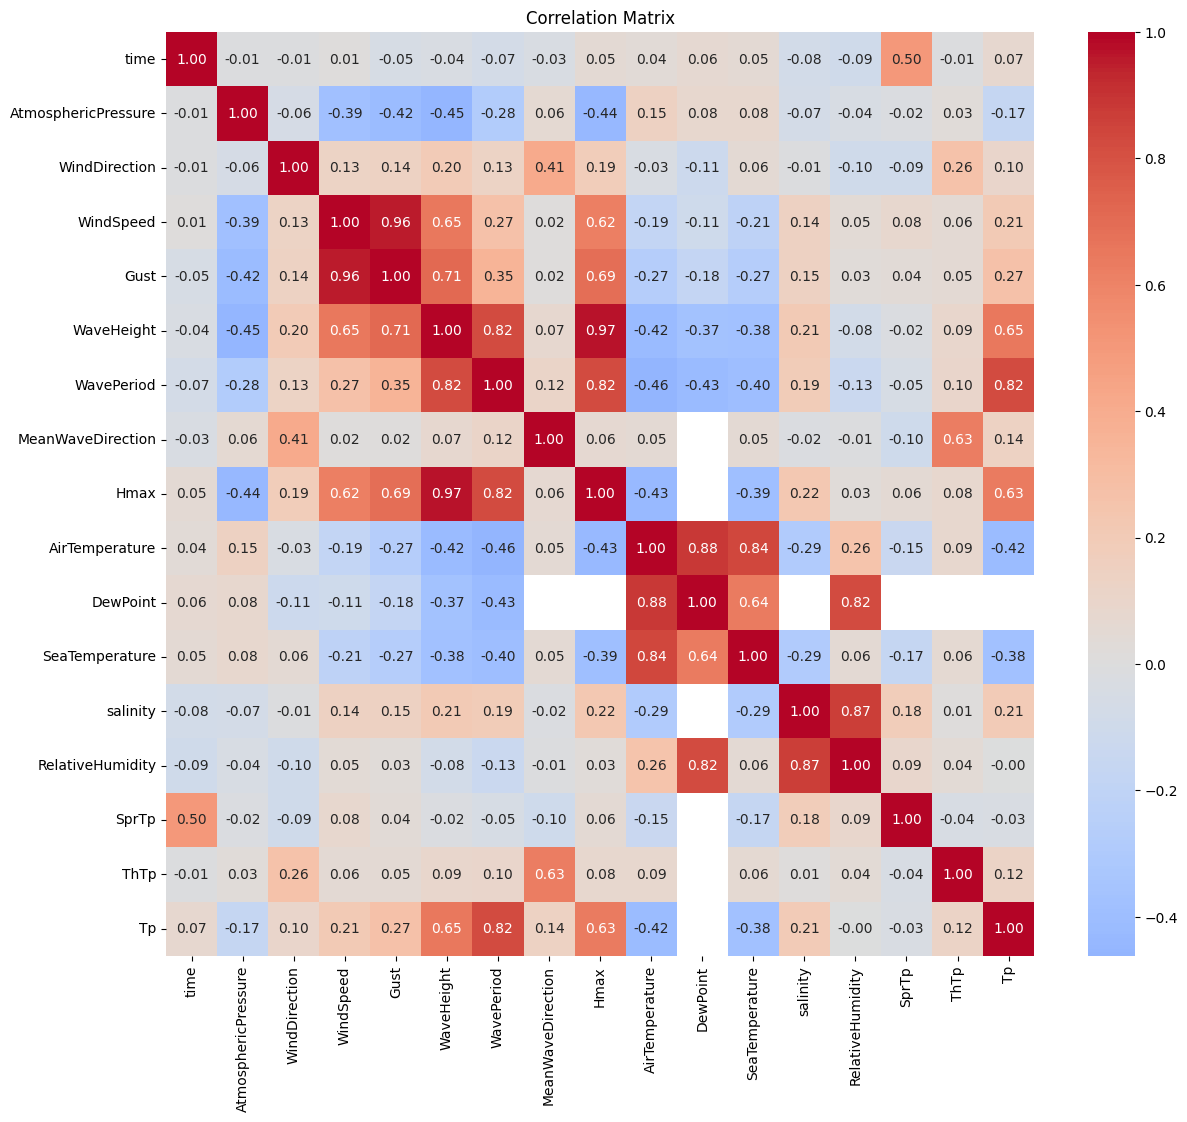

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#df = df.drop(columns=['DewPoint'])

df = df.dropna(subset=['time'])

df = df.reset_index(drop=True)

display(df.head())

,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,MeanWaveDirection,Hmax,AirTemperature,DewPoint,SeaTemperature,salinity,RelativeHumidity,SprTp,ThTp,Tp
0,2006-09-25 14:00:00+00:00,1010.0,280.0,15.0,20.0,1.2,5.0,NaN,NaN,14.7,12.4,15.5,NaN,86.0,NaN,NaN,NaN
1,2006-09-25 15:00:00+00:00,1010.4,270.0,15.0,22.0,1.3,5.0,NaN,NaN,13.9,11.4,15.4,NaN,85.0,NaN,NaN,NaN
2,2006-09-25 16:00:00+00:00,1010.8,280.0,13.0,19.0,1.4,5.0,NaN,NaN,14.8,11.7,15.4,NaN,82.0,NaN,NaN,NaN
3,2006-09-25 17:00:00+00:00,1011.0,280.0,12.0,20.0,1.6,5.0,NaN,NaN,14.8,10.7,15.4,NaN,77.0,NaN,NaN,NaN
4,2006-09-25 18:00:00+00:00,1011.6,270.0,11.0,18.0,1.8,6.0,NaN,NaN,14.8,10.7,15.4,NaN,77.0,NaN,NaN,NaN


In [ ]:
# Show shape of the data
print(f"\n📊 Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check for missing values
print("\n❓ Missing values per column:")
print(df.isnull().sum())

# Show basic statistics
print("\n📈 Descriptive statistics for numeric columns:")
display(df.describe(include='all'))


📊 Dataset contains 139827 rows and 17 columns.

❓ Missing values per column:
time                        0
AtmosphericPressure       636
WindDirection            5324
WindSpeed               18759
Gust                    25455
WaveHeight              13789
WavePeriod              13741
MeanWaveDirection      101290
Hmax                    95152
AirTemperature           4252
DewPoint                53313
SeaTemperature           3143
salinity               108076
RelativeHumidity         8235
SprTp                   95159
ThTp                    93572
Tp                      93572
dtype: int64

📈 Descriptive statistics for numeric columns:


,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,MeanWaveDirection,Hmax,AirTemperature,DewPoint,SeaTemperature,salinity,RelativeHumidity,SprTp,ThTp,Tp
count,139827,139191.000000,134503.000000,121068.000000,114372.000000,126038.000000,126086.000000,38537.000000,44675.000000,135575.000000,86514.000000,136684.000000,31751.000000,131592.000000,44668.000000,46255.000000,46255.000000
mean,2015-12-02 15:53:28.968225024+00:00,1011.481508,212.081849,16.410241,23.722852,3.357885,7.203503,237.712069,5.090595,11.736631,8.505294,12.849794,34.551860,80.087572,63.746247,233.374723,10.472316
min,2006-09-25 14:00:00+00:00,909.900000,0.000000,0.000000,0.000000,0.000000,3.516000,0.000000,0.000000,0.600000,-6.000000,0.000000,0.341800,0.000000,8.438000,0.000000,3.047000
25%,2010-11-01 04:30:00+00:00,1003.300000,160.000000,11.157000,16.000000,2.100000,6.000000,214.000000,3.125000,9.922000,5.700000,11.300000,35.302730,73.000000,30.234000,209.531000,8.672000
50%,2016-01-09 08:00:00+00:00,1012.700000,229.000000,16.000000,23.000000,3.000000,7.000000,263.000000,4.688000,11.700000,8.900000,12.435000,35.418930,81.152000,42.539000,265.781000,10.313000
75%,2020-12-22 12:30:00+00:00,1020.963500,280.000000,21.000000,30.170000,4.297000,8.000000,297.000000,6.563000,13.700000,11.300000,14.500000,35.510560,90.000000,80.244000,298.125000,12.070000
max,2025-04-23 14:00:00+00:00,1046.400000,360.000000,56.582000,84.930000,17.200000,15.469000,359.000000,29.883000,18.700000,18.300000,18.300000,35.659180,100.000000,316.406000,358.594000,23.789000
std,NaN,13.313521,87.739892,7.107276,10.066905,1.734875,1.415243,89.629841,2.624174,2.492482,3.720727,1.800058,2.886845,14.592091,50.184199,98.187149,2.553911


In [ ]:
import pandas as pd

# Assume df is your DataFrame with 139197 rows.
threshold = len(df) / 2  # Half the number of rows

# Identify columns with missing values greater than the threshold
cols_to_drop = df.columns[df.isna().sum() > threshold]
print("Columns to drop:", list(cols_to_drop))

# Drop the identified columns
df = df.drop(columns=cols_to_drop)

print("Remaining columns:", df.columns)
display(df.describe(include='all'))

Columns to drop: ['MeanWaveDirection', 'Hmax', 'salinity', 'SprTp', 'ThTp', 'Tp']
Remaining columns: Index(['time', 'AtmosphericPressure', 'WindDirection', 'WindSpeed', 'Gust',
       'WaveHeight', 'WavePeriod', 'AirTemperature', 'DewPoint',
       'SeaTemperature', 'RelativeHumidity'],
      dtype='object')


,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,AirTemperature,DewPoint,SeaTemperature,RelativeHumidity
count,139827,139191.000000,134503.000000,121068.000000,114372.000000,126038.000000,126086.000000,135575.000000,86514.000000,136684.000000,131592.000000
mean,2015-12-02 15:53:28.968225024+00:00,1011.481508,212.081849,16.410241,23.722852,3.357885,7.203503,11.736631,8.505294,12.849794,80.087572
min,2006-09-25 14:00:00+00:00,909.900000,0.000000,0.000000,0.000000,0.000000,3.516000,0.600000,-6.000000,0.000000,0.000000
25%,2010-11-01 04:30:00+00:00,1003.300000,160.000000,11.157000,16.000000,2.100000,6.000000,9.922000,5.700000,11.300000,73.000000
50%,2016-01-09 08:00:00+00:00,1012.700000,229.000000,16.000000,23.000000,3.000000,7.000000,11.700000,8.900000,12.435000,81.152000
75%,2020-12-22 12:30:00+00:00,1020.963500,280.000000,21.000000,30.170000,4.297000,8.000000,13.700000,11.300000,14.500000,90.000000
max,2025-04-23 14:00:00+00:00,1046.400000,360.000000,56.582000,84.930000,17.200000,15.469000,18.700000,18.300000,18.300000,100.000000
std,NaN,13.313521,87.739892,7.107276,10.066905,1.734875,1.415243,2.492482,3.720727,1.800058,14.592091


In [ ]:
import numpy as np
import pandas as pd

# Assume df['time'] is already a datetime column
df['hour'] = df['time'].dt.hour
df['month'] = df['time'].dt.month

# Create cyclical features for hour: 24 hours in a day
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

# Create cyclical features for month: 12 months in a year
# Subtract 1 to start from 0
df['month_sin'] = np.sin(2 * np.pi * (df['month'] - 1) / 12)
df['month_cos'] = np.cos(2 * np.pi * (df['month'] - 1) / 12)

display(df[['time', 'hour', 'hour_sin', 'hour_cos', 'month', 'month_sin', 'month_cos']].head())

,time,hour,hour_sin,hour_cos,month,month_sin,month_cos
0,2006-09-25 14:00:00+00:00,14,-0.500000,-8.660254e-01,9,-0.866025,-0.5
1,2006-09-25 15:00:00+00:00,15,-0.707107,-7.071068e-01,9,-0.866025,-0.5
2,2006-09-25 16:00:00+00:00,16,-0.866025,-5.000000e-01,9,-0.866025,-0.5
3,2006-09-25 17:00:00+00:00,17,-0.965926,-2.588190e-01,9,-0.866025,-0.5
4,2006-09-25 18:00:00+00:00,18,-1.000000,-1.836970e-16,9,-0.866025,-0.5


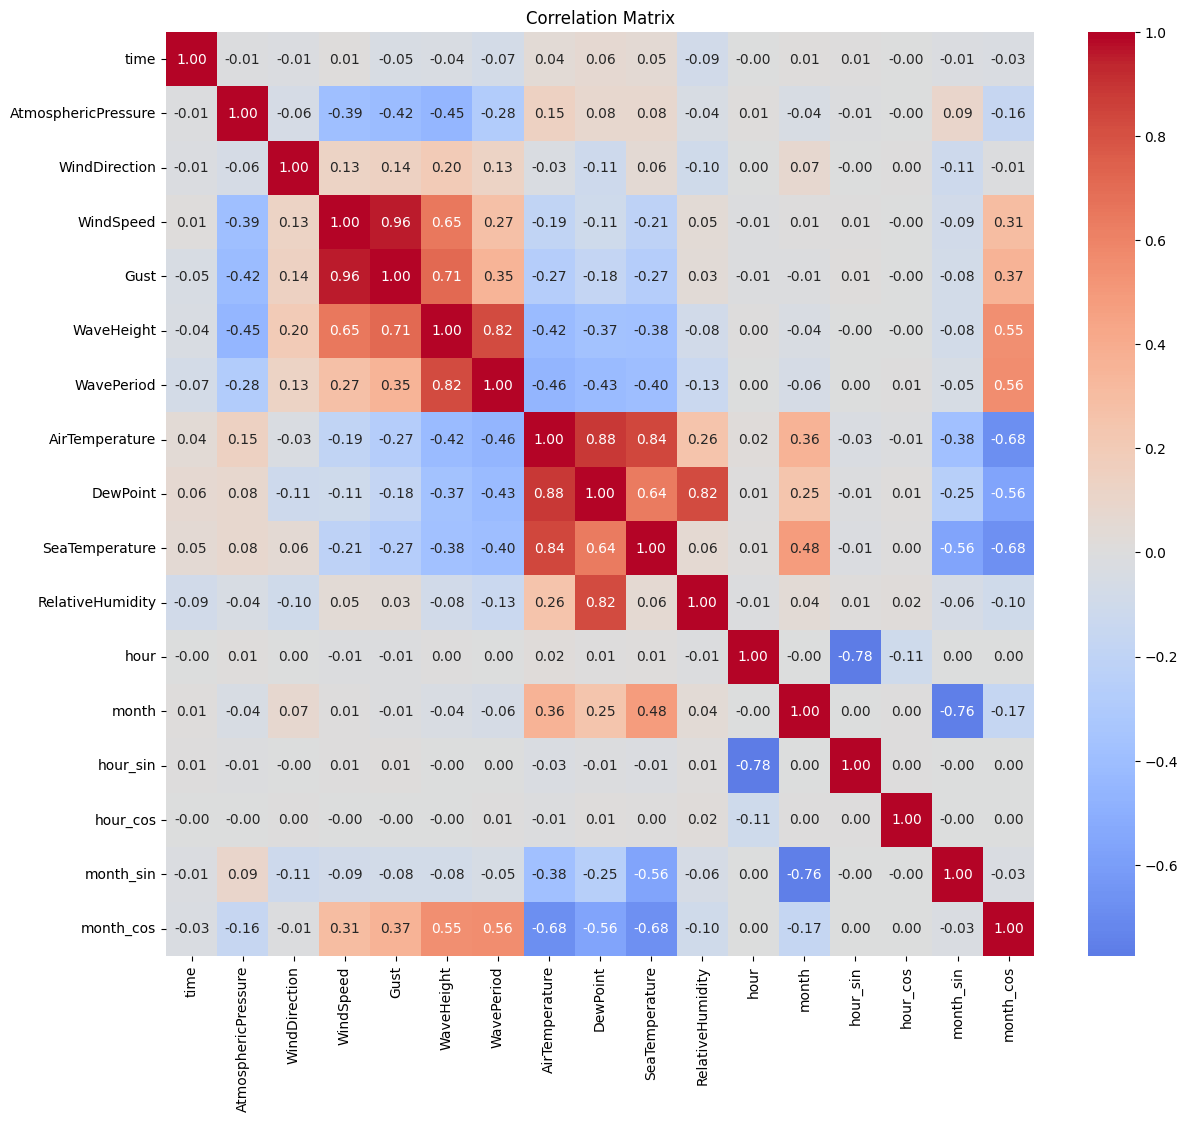

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Count the number of points by year

df['year'] = df['time'].dt.year
year_counts = df['year'].value_counts().sort_index()

display(year_counts)

,count
year,
2006,2301
2007,8675
2008,8507
2009,8481
2010,8449
2011,8367
2012,8310
2013,7892
2014,2734


In [ ]:
# Group by year and compute the mean for each numeric column
yearly_means = df.groupby('year').mean()

display(yearly_means)

,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,AirTemperature,DewPoint,SeaTemperature,RelativeHumidity,hour,month,hour_sin,hour_cos,month_sin,month_cos
year,,,,,,,,,,,,,,,,,
2006,2006-11-12 21:27:52.490221824+00:00,1004.787310,218.686957,20.376799,29.643043,4.440783,7.744348,11.750587,7.762707,12.976271,76.965217,11.534985,10.874402,-0.003565,0.003822,-0.796244,0.395804
2007,2007-07-02 08:15:00.103746560+00:00,1014.452464,214.166763,14.944464,22.483527,3.479529,7.213293,12.380870,8.760879,13.381072,79.088540,11.497983,6.521614,-0.000329,0.001220,-0.003639,-0.001714
2008,2008-07-02 05:21:53.553544192+00:00,1011.679322,216.300306,16.532217,23.944395,4.420101,7.922370,11.744319,8.299618,13.089623,80.056710,11.506642,6.521688,-0.002457,0.000873,-0.011763,0.013294
2009,2009-07-01 23:01:38.903431424+00:00,1009.124197,209.758621,16.754304,25.807859,3.676662,7.474520,11.390404,8.376022,12.853414,82.112345,11.498644,6.509846,-0.000026,0.001465,0.003262,0.009392
2010,2010-07-02 00:43:32.758906624+00:00,1012.675830,195.573931,16.718672,25.555696,2.875566,6.943812,11.569029,8.034642,12.832425,79.477697,11.477335,6.511303,0.002085,0.000036,0.001526,0.016176
2011,2011-07-01 23:28:07.056292608+00:00,1010.881798,222.203939,16.943365,24.732203,3.478803,7.579839,11.226181,8.188646,12.046630,81.981085,11.464324,6.509741,0.000103,0.003623,-0.009836,0.014733
2012,2012-06-29 18:35:11.046931200+00:00,1013.253405,218.354060,15.207346,22.752451,3.098704,7.341009,11.455519,8.586949,12.300361,83.222891,11.400842,6.441516,0.003688,0.001479,0.010926,-0.007803
2013,2013-07-02 17:13:53.400912128+00:00,1011.655158,215.486486,17.886937,24.955914,3.441601,7.332395,11.664067,8.455548,12.747855,81.243711,11.359225,6.532818,0.003861,0.004486,0.004857,-0.029464
2014,2014-05-24 20:52:08.602779904+00:00,1007.043359,201.593282,14.702647,24.252165,3.125041,7.577576,10.756942,7.547314,11.377527,82.200082,11.326993,5.266642,0.001163,-0.006738,0.305821,0.025297


In [ ]:
# Group by year and compute the number of missing values for each column
missing_by_year = df.groupby('year').apply(lambda x: x.isnull().sum())

display(missing_by_year)

<ipython-input-18-2e2a6b7791b6>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_year = df.groupby('year').apply(lambda x: x.isnull().sum())


,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,AirTemperature,DewPoint,SeaTemperature,RelativeHumidity,hour,month,hour_sin,hour_cos,month_sin,month_cos,year
year,,,,,,,,,,,,,,,,,,
2006,0,0,1,8,1,1,1,2,3,0,1,0,0,0,0,0,0,0
2007,0,10,4,248,55,48,39,34,94,16,80,0,0,0,0,0,0,0
2008,0,15,9,204,2896,5353,5351,23,139,17,131,0,0,0,0,0,0,0
2009,0,17,71,174,4562,5773,5773,134,69,148,194,0,0,0,0,0,0,0
2010,0,46,286,6853,6869,100,102,12,46,233,42,0,0,0,0,0,0,0
2011,0,247,41,2293,2411,281,282,48,282,102,278,0,0,0,0,0,0,0
2012,0,234,1475,1558,1883,365,319,93,295,284,333,0,0,0,0,0,0,0
2013,0,2,122,2426,2312,70,73,264,259,83,260,0,0,0,0,0,0,0
2014,0,1,531,807,771,318,317,314,35,785,300,0,0,0,0,0,0,0


In [ ]:
# Group by year and compute the std for each numeric column
yearly_std = df.groupby('year').std()

display(yearly_std)

,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,AirTemperature,DewPoint,SeaTemperature,RelativeHumidity,hour,month,hour_sin,hour_cos,month_sin,month_cos
year,,,,,,,,,,,,,,,,,
2006,28 days 02:07:30.279115721,16.635562,76.627008,7.494397,10.098039,1.835306,1.314700,1.954026,3.289251,1.188591,9.670456,6.939002,0.916207,0.708454,0.706046,0.205792,0.408749
2007,105 days 12:58:50.795548088,12.975641,83.667212,7.834373,11.146269,1.946110,1.501326,2.524943,3.699232,2.006522,10.158390,6.927494,3.453213,0.707228,0.707066,0.708136,0.706146
2008,106 days 13:56:12.701436664,12.345514,88.023744,7.346593,11.117158,1.932458,1.354453,2.499779,3.837903,1.605060,10.436927,6.925627,3.482426,0.707326,0.706966,0.709913,0.704149
2009,106 days 06:05:41.376053404,13.987918,83.518199,7.075217,11.073751,1.851820,1.371681,2.508325,3.720473,1.484585,9.998723,6.927848,3.475308,0.707661,0.706634,0.706369,0.707857
2010,106 days 14:16:22.218893622,13.027224,101.646688,7.478231,9.255370,1.455976,1.215398,2.847251,4.305909,1.934458,11.110575,6.924084,3.487246,0.706621,0.707673,0.710112,0.703985
2011,106 days 15:34:28.229405430,12.659051,74.591869,6.702329,9.658292,1.631233,1.408592,2.036584,3.574392,1.159604,10.843517,6.937661,3.489045,0.706632,0.707657,0.705600,0.708473
2012,105 days 00:00:25.805153270,12.129208,84.762733,6.735229,9.248541,1.457207,1.344518,2.304386,3.574680,1.721308,10.684084,6.921076,3.430150,0.707642,0.706645,0.706724,0.707447
2013,103 days 09:25:59.049960877,14.319122,81.583324,7.504730,10.997540,1.808855,1.510647,2.833902,4.101089,2.215345,10.761278,6.930787,3.385742,0.707434,0.706845,0.711779,0.701858
2014,100 days 01:56:33.899018762,14.838985,90.338720,6.812830,10.605236,1.837321,1.469855,1.981203,3.173862,1.557718,9.479889,6.868310,3.325088,0.709175,0.705259,0.614661,0.726882


In [ ]:
#df = df.drop(columns=['hour', 'month', 'hour_sin', 'hour_cos', 'year', 'month_sin', 'month_cos'])
df = df.drop(columns=['hour', 'month', 'year', 'DewPoint'])

# Select only time and the 3 columns : WaveHeight, WavePeriod, MeanWaveDirection
if drop_columns :
  df = df[selected_columns]

display(df.head())
display(df.describe())

,time,WaveHeight
0,2006-09-25 14:00:00+00:00,1.2
1,2006-09-25 15:00:00+00:00,1.3
2,2006-09-25 16:00:00+00:00,1.4
3,2006-09-25 17:00:00+00:00,1.6
4,2006-09-25 18:00:00+00:00,1.8


,WaveHeight
count,126038.000000
mean,3.357885
std,1.734875
min,0.000000
25%,2.100000
50%,3.000000
75%,4.297000
max,17.200000


## Process

In [ ]:
  if 'time' in df.columns:
    df['time'] = pd.to_datetime(df['time'])
    df = df.sort_values('time').set_index('time')

  # Ensure the DataFrame is sorted by its time index.
  df = df.sort_index()

  display(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139827 entries, 2006-09-25 14:00:00+00:00 to 2025-04-23 14:00:00+00:00
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   WaveHeight  126038 non-null  float64
dtypes: float64(1)
memory usage: 2.1 MB


None

In [ ]:
# Delete every missing row

df = df.dropna()

display(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126038 entries, 2006-09-25 14:00:00+00:00 to 2025-04-23 14:00:00+00:00
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   WaveHeight  126038 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


None

In [ ]:
import pandas as pd
import numpy as np

def extract_valid_windows(df, tar_col, context_seq_size, forecasted_seq_size):
    """
    Given a time series dataframe 'df' with several features,
    extract as many sliding windows (of length context_seq_size+forecasted_seq_size)
    for which no feature has two consecutive missing values.

    For each valid window, interpolate missing values (linearly) for every feature.

    Parameters:
        df (pd.DataFrame): The input dataframe. It must be sorted by time and have a contiguous time index.
        tar_col (str): The target column (used for naming; the check is performed on every feature).
        context_seq_size (int): Number of time steps used for context (input).
        forecasted_seq_size (int): Number of time steps used for forecast (output).

    Returns:
        X (np.ndarray): Array of shape (num_valid_windows, context_seq_size + forecasted_seq_size, n_features)
                        containing the interpolated values.
        window_start_times (list): A list of the starting timestamps of each valid window.
    """
    window_size = context_seq_size + forecasted_seq_size
    valid_windows = []
    window_start_times = []

    # Define a helper to check that the window index is contiguous.
    # For a DateTimeIndex, we expect hourly differences.
    if isinstance(df.index, pd.DatetimeIndex):
        expected_delta = pd.Timedelta(hours=1)

        def is_contiguous(index):
            # Compute differences between consecutive timestamps.
            diffs = index.to_series().diff().iloc[1:]
            return (diffs == expected_delta).all()
    else:
        # For a numeric or default index: assume difference of 1.
        def is_contiguous(index):
            diffs = pd.Series(index).diff().iloc[1:]
            return (diffs == 1).all()

    # Slide through the dataframe.
    nb_valid_windows = len(valid_windows)
    for start in range(0, len(df) - window_size + 1, 4): # step size
        if start % 10000 == 0:
            print(f"Processing window {start}")
            print(f"Progress: {start / (len(df) - window_size) * 100:.2f}%")
            print(f"number of valid windows: {len(valid_windows) - nb_valid_windows}")
            print("----------------------------------")
            nb_valid_windows = len(valid_windows)
        window = df.iloc[start:start+window_size].copy()  # make a copy for interpolation

        # Check if the index for this window is contiguous.
        if not is_contiguous(window.index):
            continue

        # Append the window data (as a numpy array) and record its start timestamp.
        valid_windows.append(window.values)
        window_start_times.append(window.index[0])

    if valid_windows:
        # Stack all valid windows into a numpy array.
        X = np.array(valid_windows)
    else:
        X = np.empty((0, window_size, df.shape[1]))

    return X, window_start_times

def split_X_y(X, context_seq_size, forecasted_seq_size, tar_col_idx):
    """
    Splits the dataset X of sliding windows into input and output parts.

    Parameters:
        X (np.ndarray): Array of shape (num_windows, context_seq_size + forecasted_seq_size, n_features)
                        containing the entire windows.
        context_seq_size (int): Number of time steps for the context (input) part.
        forecasted_seq_size (int): Number of time steps for the forecast (output) part.
        tar_col_idx (int): The index (column index) in X for the target feature.

    Returns:
        X_input (np.ndarray): Input data of shape (num_windows, context_seq_size, n_features)
        y_output (np.ndarray): Forecast output of shape (num_windows, forecasted_seq_size) for the target feature.
    """
    # Input: all features for the first context_seq_size time steps
    X_input = X[:, :context_seq_size, :]
    # Output: forecasted_seq_size time steps
    y_output = X[:, context_seq_size:context_seq_size+forecasted_seq_size, :]

    return X_input, y_output

## Create

In [ ]:
if select_dataset == "M6_buoy" :

  # Extract windows: Only windows where the target feature (tar_col) is complete are kept.
  # Note: All features (the entire df) are included in the final window.
  X, window_start_times = extract_valid_windows(df, tar_col, context_seq_size, forecasted_seq_size)
  # Check if X has any missing values, and float64
  X = X.astype(np.float64)
  if np.isnan(X).any():
      raise ValueError("X contains missing values.")

  print("Number of valid windows extracted:", X.shape[0])
  print("Shape of each window:", X.shape[1:], "\n")

  # To split the windows into input (context) and output (forecast target only), we need the index of tar_col.
  # This will be according to the DataFrame's column order.
  tar_col_idx = list(df.columns).index(tar_col)
  print("Target column index:", tar_col_idx)

  X_input, y_output = split_X_y(X, context_seq_size, forecasted_seq_size, tar_col_idx)

  print("X_input shape (context part, all features):", X_input.shape)
  print("y_output shape (forecast part, target feature only):", y_output.shape)

Processing window 0
Progress: 0.00%
number of valid windows: 0
----------------------------------
Processing window 10000
Progress: 7.96%
number of valid windows: 362
----------------------------------
Processing window 20000
Progress: 15.91%
number of valid windows: 54
----------------------------------
Processing window 30000
Progress: 23.87%
number of valid windows: 541
----------------------------------
Processing window 40000
Progress: 31.83%
number of valid windows: 0
----------------------------------
Processing window 50000
Progress: 39.78%
number of valid windows: 0
----------------------------------
Processing window 60000
Progress: 47.74%
number of valid windows: 250
----------------------------------
Processing window 70000
Progress: 55.70%
number of valid windows: 1054
----------------------------------
Processing window 80000
Progress: 63.65%
number of valid windows: 553
----------------------------------
Processing window 90000
Progress: 71.61%
number of valid windows: 1

In [ ]:
def split_train_val_test(X_input, y_output, train_ratio=0.7, val_ratio=0.1, test_ratio=0.2):
    """
    Splits the dataset (X_input, y_output) into training, validation, and test sets
    based on the ratios provided. The split is done sequentially as the data is assumed
    to be in chronological order.

    Parameters:
      X_input (np.ndarray): Input data of shape (n_windows, context_seq_size, n_features).
      y_output (np.ndarray): Output data of shape (n_windows, forecasted_seq_size) for the target feature.
      train_ratio (float): The fraction for the training set.
      val_ratio (float): The fraction for the validation set.
      test_ratio (float): The fraction for the test set.

    Returns:
      A tuple of tuples: ((X_train, y_train), (X_val, y_val), (X_test, y_test))
    """
    # Check that ratios sum to 1.0 (or nearly)
    total_ratio = train_ratio + val_ratio + test_ratio
    if not np.isclose(total_ratio, 1.0):
        raise ValueError("The train, validation, and test ratios must sum to 1.0")

    n_windows = X_input.shape[0]
    train_end = int(n_windows * train_ratio)
    val_end = train_end + int(n_windows * val_ratio)

    # Sequential splitting
    X_train, y_train = X_input[:train_end], y_output[:train_end]
    X_val, y_val     = X_input[train_end:val_end], y_output[train_end:val_end]
    X_test, y_test   = X_input[val_end:], y_output[val_end:]

    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

# Perform a 7:1:2 split
if select_dataset == "M6_buoy" :

  (train_data, train_labels), (val_data, val_labels), (test_data, test_labels) = split_train_val_test(X_input, y_output, 0.7, 0.1, 0.2)

  print("Training set shape (X, y):", train_data.shape, train_labels.shape)
  print("Validation set shape (X, y):", val_data.shape, val_labels.shape)
  print("Test set shape (X, y):", test_data.shape, test_labels.shape)

Training set shape (X, y): (4789, 336, 1) (4789, 24, 1)
Validation set shape (X, y): (684, 336, 1) (684, 24, 1)
Test set shape (X, y): (1369, 336, 1) (1369, 24, 1)


In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126038 entries, 2006-09-25 14:00:00+00:00 to 2025-04-23 14:00:00+00:00
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   WaveHeight  126038 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


None

In [ ]:
M6_df = df.copy()

# Building the Dataset




## Def Dataset

In [ ]:
# Select the Dataset

if select_dataset == "Weather":
  df = Weather_df.copy()
  df = df.set_index('time')

if select_dataset == "M6_buoy":
  df = M6_df.copy()

target_idx = df.columns.get_loc(tar_col)

print("Target column index:", target_idx)

display(df.info())

display(df.describe())

Target column index: 0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126038 entries, 2006-09-25 14:00:00+00:00 to 2025-04-23 14:00:00+00:00
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   WaveHeight  126038 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


None

,WaveHeight
count,126038.000000
mean,3.357885
std,1.734875
min,0.000000
25%,2.100000
50%,3.000000
75%,4.297000
max,17.200000


In [ ]:
# Do a 7:1:2 Split Chronologically

train_size = int(0.7 * len(df))
val_size = int(0.1 * len(df))
test_size = len(df) - train_size - val_size

df_train = df[:train_size]
df_val = df[train_size:train_size+val_size]
df_test = df[train_size+val_size:]

print("Train size:", df_train.shape)
print("Validation size:", df_val.shape)
print("Test size:", df_test.shape)

feature_num = int(df.shape[1])
print("Number of features:", feature_num)

Train size: (88226, 1)
Validation size: (12603, 1)
Test size: (25209, 1)
Number of features: 1


## Sliding Windows

In [ ]:
import numpy as np

# Steps of size : Choose to overlap or not
step_size_generation = forecasted_seq_size # Prediction Plots
#step_size = 1 # Full Overlapping
step_size = 8 # Overlapping

def create_sliding_windows(df, input_len=context_seq_size, output_len=forecasted_seq_size, target_col=tar_col, step_size=step_size):
    """
    df: DataFrame with numeric features (no time col)
    input_len: number of past time steps
    output_len: number of future time steps
    target_col: column to predict
    Returns: X, y arrays for model training
    """
    X, y = [], []
    total_len = input_len + output_len
    # Use a step equal to input_len to allow overlapping windows.
    for i in range(0, len(df) - total_len + 1, step_size):
        x_window = df.iloc[i:i+input_len].values
        y_window = df[target_col].iloc[i+input_len:i+total_len].values
        X.append(x_window)
        y.append(y_window)
    return np.array(X), np.array(y)

def create_sliding_windows_full_features(df, input_len=context_seq_size, output_len=forecasted_seq_size, step_size=step_size):
    """
    df: DataFrame with numeric features (no time col)
    input_len: number of past time steps
    output_len: number of future time steps
    Returns: X, Y arrays for model training
    """
    X, Y = [], []
    total_len = input_len + output_len
    # Use a step equal to input_len to allow overlapping windows.
    for i in range(0, len(df) - total_len + 1, step_size):
        x_window = df.iloc[i:i+input_len].values
        y_window = df.iloc[i+input_len:i+total_len].values
        X.append(x_window)
        Y.append(y_window)
    return np.array(X), np.array(Y)



In [ ]:
# Build sliding windows


if select_dataset == "Weather":
  X, Y = create_sliding_windows_full_features(df_train, input_len=context_seq_size, output_len=forecasted_seq_size)

  X_val, Y_val = create_sliding_windows_full_features(df_val, input_len=context_seq_size, output_len=forecasted_seq_size)

  X_test, Y_test = create_sliding_windows_full_features(df_test, input_len=context_seq_size, output_len=forecasted_seq_size)

  print("X shape:", X.shape)
  print("y shape:", Y.shape)

  print("X_val shape:", X_val.shape)
  print("y_val shape:", Y_val.shape)

  print("X_test shape:", X_test.shape)
  print("y_test shape:", Y_test.shape)

if select_dataset == "M6_buoy":

  X, Y = train_data, train_labels

  X_val, Y_val = val_data, val_labels

  X_test, Y_test = test_data, test_labels

  print("X shape:", X.shape)
  print("y shape:", Y.shape)

  print("X_val shape:", X_val.shape)
  print("y_val shape:", Y_val.shape)

  print("X_test shape:", X_test.shape)
  print("y_test shape:", Y_test.shape)

X shape: (4789, 336, 1)
y shape: (4789, 24, 1)
X_val shape: (684, 336, 1)
y_val shape: (684, 24, 1)
X_test shape: (1369, 336, 1)
y_test shape: (1369, 24, 1)


## Downsample

In [ ]:
if downsampling :

  # Reshape and average over groups of 6 along axis 1
  Y = Y.reshape(Y.shape[0], Y.shape[1]//6, 6, *Y.shape[2:]).mean(axis=2)
  Y_val = Y_val.reshape(Y_val.shape[0], Y_val.shape[1]//6, 6, *Y_val.shape[2:]).mean(axis=2)
  Y_test = Y_test.reshape(Y_test.shape[0], Y_test.shape[1]//6, 6, *Y_test.shape[2:]).mean(axis=2)

  print("y shape:", Y.shape)
  print("y_val shape:", Y_val.shape)
  print("y_test shape:", Y_test.shape)

  forecasted_seq_size = Y.shape[1]

## Rescaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np

# Rescale the Data By fitting a StandardScaler on the training Set

if rescale_data :

  if select_dataset == "Weather":
    scaler = StandardScaler()
    X_fit = df_train.values
    print(X_fit.shape)
    scaler.fit(X_fit)

  if select_dataset == "M6_buoy":
    scaler = StandardScaler()
    scaler.fit(X.reshape(X.shape[0] * X.shape[1], X.shape[2]))

  X_reshaped = X.reshape(X.shape[0] * X.shape[1], X.shape[2])
  X_rescaled = scaler.transform(X_reshaped)
  X_rescaled = X_rescaled.reshape(X.shape[0], X.shape[1], X.shape[2])

  Y_reshaped = Y.reshape(Y.shape[0] * Y.shape[1], Y.shape[2])
  Y_rescaled = scaler.transform(Y_reshaped)
  Y_rescaled = Y_rescaled.reshape(Y.shape[0], Y.shape[1], Y.shape[2])

  print("X_rescaled shape:", X_rescaled.shape)
  print("y_rescaled shape:", Y_rescaled.shape)

  X_val_reshaped = X_val.reshape(X_val.shape[0] * X_val.shape[1], X_val.shape[2])
  X_val_rescaled = scaler.transform(X_val_reshaped)
  X_val_rescaled = X_val_rescaled.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2])

  Y_val_reshaped = Y_val.reshape(Y_val.shape[0] * Y_val.shape[1], Y_val.shape[2])
  Y_val_rescaled = scaler.transform(Y_val_reshaped)
  Y_val_rescaled = Y_val_rescaled.reshape(Y_val.shape[0], Y_val.shape[1], Y_val.shape[2])

  print("X_val_rescaled shape:", X_val_rescaled.shape)
  print("y_val_rescaled shape:", Y_val_rescaled.shape)

  X_test_reshaped = X_test.reshape(X_test.shape[0] * X_test.shape[1], X_test.shape[2])
  X_test_rescaled = scaler.transform(X_test_reshaped)
  X_test_rescaled = X_test_rescaled.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

  Y_test_reshaped = Y_test.reshape(Y_test.shape[0] * Y_test.shape[1], Y_test.shape[2])
  Y_test_rescaled = scaler.transform(Y_test_reshaped)
  Y_test_rescaled = Y_test_rescaled.reshape(Y_test.shape[0], Y_test.shape[1], Y_test.shape[2])

  print("X_test_rescaled shape:", X_test_rescaled.shape)
  print("y_test_rescaled shape:", Y_test_rescaled.shape)

else :
  X_rescaled = X
  Y_rescaled = Y
  X_val_rescaled = X_val
  Y_val_rescaled = Y_val
  X_test_rescaled = X_test
  Y_test_rescaled = Y_test

X_rescaled shape: (4789, 336, 1)
y_rescaled shape: (4789, 24, 1)
X_val_rescaled shape: (684, 336, 1)
y_val_rescaled shape: (684, 24, 1)
X_test_rescaled shape: (1369, 336, 1)
y_test_rescaled shape: (1369, 24, 1)


In [ ]:
feature_num = len(X_rescaled[0][0])
print("feature_num :", len(X_rescaled[0][0]))

feature_num : 1


## Dataset and DataLoader

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class WaveForecastDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create loaders

batch_size = 64

train_loader = DataLoader(WaveForecastDataset(X_rescaled, Y_rescaled), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(WaveForecastDataset(X_val_rescaled, Y_val_rescaled), batch_size=batch_size, shuffle=False)
test_loader = DataLoader(WaveForecastDataset(X_test_rescaled, Y_test_rescaled), batch_size=batch_size, shuffle=False)

train_loader_uni = DataLoader(WaveForecastDataset(X_rescaled, Y_rescaled[:,:,target_idx].squeeze()), batch_size=batch_size, shuffle=True)
val_loader_uni = DataLoader(WaveForecastDataset(X_val_rescaled, Y_val_rescaled[:,:,target_idx].squeeze()), batch_size=batch_size, shuffle=False)
test_loader_uni = DataLoader(WaveForecastDataset(X_test_rescaled, Y_test_rescaled[:,:,target_idx].squeeze()), batch_size=batch_size, shuffle=False)


# LSTM Model


## Model Definition

In [ ]:
import torch.nn as nn

class LSTMForecastModel(nn.Module):
    def __init__(self, input_size=feature_num, hidden_size=64, num_layers=2, output_size=forecasted_seq_size):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x: (batch, seq_len, input_size)
        _, (hn, _) = self.lstm(x)  # hn: (num_layers, batch, hidden_size)
        last_hidden = hn[-1]       # Take hidden state from last LSTM layer
        out = self.fc(last_hidden) # Shape: (batch, output_size)
        return out


## Training

In [ ]:
import torch.optim as optim
import time

lstm_hidden_size = 64
lstm_num_layers = 2

# -------------------------------
# LSTM Training Pipeline
# -------------------------------

if LSTM_Train :
  model = LSTMForecastModel(input_size=feature_num, hidden_size=lstm_hidden_size, num_layers=lstm_num_layers, output_size=forecasted_seq_size).to(device)
  lstm_num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
  print(f"Number of parameters: {lstm_num_params}")

  criterion = nn.MSELoss()

  optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

  best_val_loss = float('inf')
  patience = 3
  epochs_no_improve = 0
  n_epochs = 100

  start_time = time.time()

  for epoch in range(n_epochs):
      model.train()
      train_loss = 0
      for X_batch, y_batch in train_loader_uni:
          X_batch, y_batch = X_batch.to(device), y_batch.to(device)

          optimizer.zero_grad()
          output = model(X_batch)
          loss = criterion(output, y_batch)
          loss.backward()
          optimizer.step()
          train_loss += loss.item()

      train_loss /= len(train_loader_uni)

      # Validation
      model.eval()
      val_loss = 0
      with torch.no_grad():
          for X_batch, y_batch in val_loader_uni:
              X_batch, y_batch = X_batch.to(device), y_batch.to(device)
              output = model(X_batch)
              loss = criterion(output, y_batch)
              val_loss += loss.item()
      val_loss /= len(val_loader_uni)

      # Testing Loop
      model.eval()
      test_loss = 0.0
      with torch.no_grad():
          for X_batch, y_batch in test_loader_uni:
              X_batch, y_batch = X_batch.to(device), y_batch.to(device)
              output = model(X_batch)
              loss = criterion(output, y_batch)
              test_loss += loss.item()
      test_loss /= len(test_loader_uni)
      print(f"Epoch {epoch+1}/{n_epochs} — Train Loss: {train_loss:.4f} — Val Loss: {val_loss:.4f} - Test Loss: {test_loss:.4f}")

      # Early stopping
      if val_loss < best_val_loss:
          best_val_loss = val_loss
          epochs_no_improve = 0
          torch.save(model.state_dict(), 'best_lstm.pt')
      else:
          epochs_no_improve += 1
          if epochs_no_improve >= patience:
              print("Early stopping triggered!")
              break

  lstm_training_time = (time.time() - start_time)/(epoch+1)
  print(f"Training time: {lstm_training_time:.2f} seconds")

Number of parameters: 51992
Epoch 1/100 — Train Loss: 0.6093 — Val Loss: 0.2899 - Test Loss: 0.2652
Epoch 2/100 — Train Loss: 0.3709 — Val Loss: 0.2669 - Test Loss: 0.2507
Epoch 3/100 — Train Loss: 0.3463 — Val Loss: 0.2516 - Test Loss: 0.2339
Epoch 4/100 — Train Loss: 0.3396 — Val Loss: 0.2428 - Test Loss: 0.2219
Epoch 5/100 — Train Loss: 0.3323 — Val Loss: 0.2411 - Test Loss: 0.2232
Epoch 6/100 — Train Loss: 0.3292 — Val Loss: 0.2357 - Test Loss: 0.2161
Epoch 7/100 — Train Loss: 0.3263 — Val Loss: 0.2343 - Test Loss: 0.2126
Epoch 8/100 — Train Loss: 0.3266 — Val Loss: 0.2361 - Test Loss: 0.2168
Epoch 9/100 — Train Loss: 0.3266 — Val Loss: 0.2425 - Test Loss: 0.2215
Epoch 10/100 — Train Loss: 0.3252 — Val Loss: 0.2355 - Test Loss: 0.2151
Early stopping triggered!
Training time: 0.41 seconds


## Test Metrics

In [ ]:
# Load best model

if LSTM_Train :
  model = LSTMForecastModel(input_size=feature_num, hidden_size=lstm_hidden_size, num_layers=lstm_num_layers, output_size=forecasted_seq_size).to(device)
  model.load_state_dict(torch.load('best_lstm.pt'))
  model.eval()

  preds = []
  targets = []

  with torch.no_grad():
      for X_batch, y_batch in test_loader_uni:
          X_batch = X_batch.to(device)
          output = model(X_batch)
          preds.append(output.cpu())
          targets.append(y_batch)

  y_pred_lstm = torch.cat(preds).numpy()
  y_true_lstm = torch.cat(targets).numpy()

  print("y_pred_lstm shape:", y_pred_lstm.shape)
  print("y_true_lstm shape:", y_true_lstm.shape)

  from sklearn.metrics import mean_absolute_error, mean_squared_error

  mae = mean_absolute_error(y_true_lstm, y_pred_lstm)
  mse = mean_squared_error(y_true_lstm, y_pred_lstm)

  print(f"LSTM MAE:  {mae:.3f}")
  print(f"LSTM MSE: {mse:.3f}")

y_pred_lstm shape: (1369, 24)
y_true_lstm shape: (1369, 24)
LSTM MAE:  0.298
LSTM MSE: 0.215


# SegRNN

## Model

In [ ]:
import torch
import torch.nn as nn


import torch
import torch.nn as nn

# multi = True  # or False

class SegRNN(nn.Module):
    """
    Segment Recurrent Neural Network for long-term multivariate time series forecasting.

    Args:
        input_len (int): Length of the historical look-back window L.
        horizon (int): Forecast horizon H.
        window_size (int): Segment length w (must divide both L and H).
        hidden_dim (int): Dimensionality d of GRU hidden state.
        num_features (int): Number of input variables/features ft (for CP embeddings).
        num_layers (int, optional): Number of GRU layers (default: 1).
        dropout (float, optional): Dropout rate after decoding GRU (default: 0.0).
    """
    def __init__(
        self,
        input_len: int,
        horizon: int,
        window_size: int,
        hidden_dim: int,
        num_features: int,
        num_layers: int = 1,
        dropout: float = 0.0,
    ):
        super().__init__()
        assert input_len % window_size == 0 and horizon % window_size == 0, \
            "window_size must divide both input_len and horizon"

        # core attributes
        self.L = input_len
        self.H = horizon
        self.w = window_size
        self.n = input_len // window_size
        self.m = horizon // window_size
        self.d = hidden_dim
        self.num_layers = num_layers
        self.F = num_features

        # whether to include channel embedding
        self.multi = multi  # <<< multi‐switch

        # Projection of each segment along time: R^w -> R^d
        self.input_proj = nn.Sequential(
            nn.Linear(self.w, self.d),
            nn.ReLU()
        )

        # Shared GRU for encoding and decoding
        self.gru = nn.GRU(
            input_size=self.d,
            hidden_size=self.d,
            num_layers=self.num_layers,
            batch_first=True
        )

        # Positional embeddings
        if self.multi:
            # split d into two halves: rel‐pos + chan‐pos
            self.rel_pos_emb = nn.Embedding(self.m, self.d // 2)
            self.chan_pos_emb = nn.Embedding(self.F, self.d // 2)
        else:
            # no channel embedding: give full d to relative positions
            self.rel_pos_emb = nn.Embedding(self.m, self.d)
            self.chan_pos_emb = None  # unused
        # <<< multi‐switch

        self.dropout = nn.Dropout(dropout)
        self.pred_layer = nn.Linear(self.d, self.w)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Forward pass of SegRNN.

        Args:
            x: Tensor of shape (batch_size, L, F)
        Returns:
            y: Tensor of shape (batch_size, H, F)
        """
        B, L, F = x.shape
        assert L == self.L and F == self.F, \
            f"Expected input shape (_, {self.L}, {self.F}), got {x.shape}"

        # Instance normalization along time
        last = x[:, -1, :]              # (B, F)
        x_norm = x - last.unsqueeze(1)  # (B, L, F)

        # flatten to (B*F, L)
        x_flat = x_norm.permute(0, 2, 1).contiguous().view(B * F, L)
        x_seg  = x_flat.view(B * F, self.n, self.w)  # (B*F, n, w)
        x_proj = self.input_proj(x_seg)             # (B*F, n, d)

        # encode
        _, h_n   = self.gru(x_proj)   # (num_layers, B*F, d)
        h_enc    = h_n[-1]            # (B*F, d)

        # prepare decoder initial states
        h0_dec = h_n.repeat(1, 1, 1)                  # (num_layers, B*F, d)
        h_rep  = h_enc.unsqueeze(1).expand(-1, self.m, -1)  # (B*F, m, d)

        # build positional bias
        # relative positions
        rp = self.rel_pos_emb.weight.unsqueeze(0).expand(B * F, -1, -1)
        if self.multi:
            # channel positions only when multi=True
            feat_idx = torch.arange(F, device=x.device) \
                          .unsqueeze(0).expand(B, -1).reshape(-1)  # (B*F,)
            cp = self.chan_pos_emb(feat_idx)                  # (B*F, d/2)
            cp = cp.unsqueeze(1).expand(-1, self.m, -1)       # (B*F, m, d/2)
            pe = torch.cat([rp, cp], dim=-1)                  # (B*F, m, d)
        else:
            # no channel embedding
            pe = rp  # (B*F, m, d)
        # <<< multi‐switch

        # decode
        dec_in  = h_rep + pe              # (B*F, m, d)
        dec_out, _ = self.gru(dec_in, h0_dec)
        dec_out = self.dropout(dec_out)

        # predict per-segment
        seg_preds = self.pred_layer(dec_out)  # (B*F, m, w)
        y_norm   = seg_preds.view(B, F, self.H)  # (B, F, H)

        # un-normalize and reshape
        y = y_norm + last.unsqueeze(-1)          # (B, F, H)
        return y.permute(0, 2, 1).contiguous()   # (B, H, F)


## Training

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
#from segrnn import SegRNN  # assuming your module is saved as segrnn.py

# -------------------------------
# SegRNN Training Pipeline (Multivariate)
# -------------------------------
if SegRNN_Train :
  # Hyperparameters (tweak as needed)
  input_len      = context_seq_size           # historical look-back window L
  horizon        = forecasted_seq_size           # forecast horizon H
  window_size    = min(48, forecasted_seq_size//4)            # segment length w (must divide L & H)
  seg_hidden_dim = 512           # GRU hidden size d
  seg_num_layers = 1             # number of GRU layers
  dropout_rate   = 0.5           # dropout after decoding
  learning_rate  = 1e-4          # optimizer learning rate
  n_epochs       = 100           # max number of epochs
  patience       = 10             # early-stop patience

  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  # replace with the actual number of channels in your dataset
  num_channels = feature_num

  model = SegRNN(
      input_len=input_len,
      horizon=horizon,
      window_size=window_size,
      hidden_dim=seg_hidden_dim,
      num_features=feature_num,
      num_layers=seg_num_layers,
      dropout=dropout_rate
  ).to(device)

  SegRNN_num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
  print(f"Number of trainable parameters: {SegRNN_num_params:,}")

  #criterion = nn.MSELoss()
  criterion = nn.L1Loss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)

  best_val_loss = float('inf')
  epochs_no_improve = 0

  start_time = time.time()
  for epoch in range(1, n_epochs + 1):
      # ---- Training ----
      model.train()
      train_loss = 0.0
      for X_batch, y_batch in train_loader:
          X_batch = X_batch.to(device)        # shape: (B, L, F)
          y_batch = y_batch.to(device)        # shape: (B, H, F)

          optimizer.zero_grad()
          preds = model(X_batch)              # (B, H, F))
          loss = criterion(preds, y_batch)
          loss.backward()
          optimizer.step()
          train_loss += loss.item()
      train_loss /= len(train_loader)

      # ---- Validation ----
      model.eval()
      val_loss = 0.0
      with torch.no_grad():
          for X_batch, y_batch in val_loader:
              X_batch = X_batch.to(device)
              y_batch = y_batch.to(device)
              preds = model(X_batch)
              val_loss += criterion(preds, y_batch).item()
      val_loss /= len(val_loader)

      # ---- Testing ----
      test_loss = 0.0
      with torch.no_grad():
          for X_batch, y_batch in test_loader:
              X_batch = X_batch.to(device)
              y_batch = y_batch.to(device)
              preds = model(X_batch)
              test_loss += criterion(preds, y_batch).item()
      test_loss /= len(test_loader)

      print(f"Epoch {epoch}/{n_epochs} "
            f"— Train Loss: {train_loss:.4f} "
            f"— Val Loss: {val_loss:.4f} "
            f"— Test Loss: {test_loss:.4f}")

      # ---- Apply 0.8× decay once after epoch 3 ----
      if epoch == 3:
          for pg in optimizer.param_groups:
              pg['lr'] *= 0.8
          print(f"--> Learning rate decayed to {optimizer.param_groups[0]['lr']:.2e}")

      # ---- Early Stopping ----
      if val_loss < best_val_loss:
          best_val_loss = val_loss
          epochs_no_improve = 0
          torch.save(model.state_dict(), 'best_segrnn.pt')
      else:
          epochs_no_improve += 1
          if epochs_no_improve >= patience:
              print("Early stopping triggered.")
              break

  SegRNN_training_time = (time.time() - start_time) / epoch
  print(f"Average training time per epoch: {SegRNN_training_time:.2f} seconds")


Number of trainable parameters: 1,584,646
Epoch 1/100 — Train Loss: 0.4097 — Val Loss: 0.3290 — Test Loss: 0.2871
Epoch 2/100 — Train Loss: 0.3858 — Val Loss: 0.3286 — Test Loss: 0.2857
Epoch 3/100 — Train Loss: 0.3782 — Val Loss: 0.3297 — Test Loss: 0.2764
--> Learning rate decayed to 8.00e-05
Epoch 4/100 — Train Loss: 0.3755 — Val Loss: 0.3301 — Test Loss: 0.2748
Epoch 5/100 — Train Loss: 0.3714 — Val Loss: 0.3337 — Test Loss: 0.2772
Epoch 6/100 — Train Loss: 0.3719 — Val Loss: 0.3238 — Test Loss: 0.2807
Epoch 7/100 — Train Loss: 0.3713 — Val Loss: 0.3263 — Test Loss: 0.2813
Epoch 8/100 — Train Loss: 0.3702 — Val Loss: 0.3195 — Test Loss: 0.2806
Epoch 9/100 — Train Loss: 0.3680 — Val Loss: 0.3199 — Test Loss: 0.2772
Epoch 10/100 — Train Loss: 0.3698 — Val Loss: 0.3178 — Test Loss: 0.2807
Epoch 11/100 — Train Loss: 0.3675 — Val Loss: 0.3249 — Test Loss: 0.2750
Epoch 12/100 — Train Loss: 0.3660 — Val Loss: 0.3179 — Test Loss: 0.2759
Epoch 13/100 — Train Loss: 0.3660 — Val Loss: 0.3162 

## Testing

In [ ]:
import torch
#from segrnn import SegRNN
from sklearn.metrics import mean_absolute_error, mean_squared_error

# -------------------------------
# SegRNN Testing Pipeline
# -------------------------------
if SegRNN_Train :
# Hyperparameters must match those used during training
  input_len      = context_seq_size           # historical look-back window L
  horizon        = forecasted_seq_size           # forecast horizon H
  window_size    = forecasted_seq_size//4            # segment length w (must divide L & H)
  seg_hidden_dim = 512
  seg_num_layers = 1
  dropout_rate   = 0.1
  device         = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  num_channels   = next(iter(test_loader))[0].shape[1]  # infer C from test_loader

  # Recreate model and load weights
  model = SegRNN(
      input_len=input_len,
      horizon=horizon,
      window_size=window_size,
      hidden_dim=seg_hidden_dim,
      num_features=feature_num,
      num_layers=seg_num_layers,
      dropout=dropout_rate
  ).to(device)

  param_count = sum(p.numel() for p in model.parameters() if p.requires_grad)
  print(f"Number of parameters: {param_count:,}")

  model.load_state_dict(torch.load('best_segrnn.pt', weights_only=True))
  model.eval()

  # ---- Multivariate evaluation ----
  all_preds = []
  all_targets = []
  with torch.no_grad():
      for X_batch, Y_batch in test_loader:
          X_batch = X_batch.to(device)  # (B, L, F)
          preds = model(X_batch)        # (B, H, F)
          all_preds.append(preds.cpu())
          all_targets.append(Y_batch)

  Y_pred_SegRNN = torch.cat(all_preds).numpy()    # shape: (N, H, F)
  Y_true_SegRNN = torch.cat(all_targets).numpy()  # shape: (N, H, F)
  print("Y_pred shape:", Y_pred_SegRNN.shape)
  print("Y_true shape:", Y_true_SegRNN.shape)

  mae_multi = mean_absolute_error(Y_true_SegRNN.flatten(), Y_pred_SegRNN.flatten())
  mse_multi = mean_squared_error(Y_true_SegRNN.flatten(), Y_pred_SegRNN.flatten())
  print(f"SegRNN Multivariate MAE: {mae_multi:.4f}")
  print(f"SegRNN Multivariate MSE: {mse_multi:.4f}")

  # ---- Single-channel evaluation ----
  all_preds = []
  all_targets = []
  with torch.no_grad():
      for X_batch, Y_batch in test_loader:
          X_batch = X_batch.to(device)
          preds = model(X_batch)[:, :, target_idx]  # (B, H)
          all_preds.append(preds.cpu())
          all_targets.append(Y_batch[:, :, target_idx])

  Y_pred_uni_SegRNN = torch.cat(all_preds).numpy()    # shape: (N, H)
  Y_true_uni_SegRNN = torch.cat(all_targets).numpy()  # shape: (N, H)
  print("Y_pred_uni shape:", Y_pred_uni_SegRNN.shape)
  print("Y_true_uni shape:", Y_true_uni_SegRNN.shape)

  mae_uni = mean_absolute_error(Y_true_uni_SegRNN.flatten(), Y_pred_uni_SegRNN.flatten())
  mse_uni = mean_squared_error(Y_true_uni_SegRNN.flatten(), Y_pred_uni_SegRNN.flatten())
  print(f"SegRNN MAE on channel {target_idx}: {mae_uni:.4f}")
  print(f"SegRNN MSE on channel {target_idx}: {mse_uni:.4f}")


Number of parameters: 1,584,646
Y_pred shape: (1369, 24, 1)
Y_true shape: (1369, 24, 1)
SegRNN Multivariate MAE: 0.2769
SegRNN Multivariate MSE: 0.2078
Y_pred_uni shape: (1369, 24)
Y_true_uni shape: (1369, 24)
SegRNN MAE on channel 0: 0.2769
SegRNN MSE on channel 0: 0.2078


# TCN Model

## Model Definition

In [ ]:
import time
import torch
import torch.nn as nn
import torch.optim as optim

# -------------------------------
# Chomp1d: Remove extra timesteps
# -------------------------------
class Chomp1d(nn.Module):
    def __init__(self, chomp_size):
        super(Chomp1d, self).__init__()
        self.chomp_size = chomp_size

    def forward(self, x):
        # x: (batch, channels, seq_len)
        # Remove the last chomp_size timesteps
        if self.chomp_size > 0:
            return x[:, :, :-self.chomp_size]
        return x

# -------------------------------
# Define a Temporal Block for the TCN
# -------------------------------
class TemporalBlock(nn.Module):
    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, dropout=0.2):
        super(TemporalBlock, self).__init__()
        self.kernel_size = kernel_size
        self.dilation = dilation
        # Padding: pad on the left with (kernel_size - 1) * dilation timesteps.
        self.padding = (kernel_size - 1) * dilation

        self.conv1 = nn.Conv1d(
            in_channels=n_inputs,
            out_channels=n_outputs,
            kernel_size=kernel_size,
            stride=stride,
            padding=self.padding,
            dilation=dilation
        )
        self.chomp1 = Chomp1d(self.padding)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)

        self.conv2 = nn.Conv1d(
            in_channels=n_outputs,
            out_channels=n_outputs,
            kernel_size=kernel_size,
            stride=stride,
            padding=self.padding,
            dilation=dilation
        )
        self.chomp2 = Chomp1d(self.padding)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)

        # Downsample if input and output channels differ.
        self.downsample = nn.Conv1d(n_inputs, n_outputs, kernel_size=1) if n_inputs != n_outputs else None

        self.init_weights()

    def init_weights(self):
        nn.init.kaiming_normal_(self.conv1.weight)
        nn.init.kaiming_normal_(self.conv2.weight)
        if self.downsample is not None:
            nn.init.kaiming_normal_(self.downsample.weight)

    def forward(self, x):
        # x shape: (batch, n_inputs, seq_len)
        out = self.conv1(x)
        out = self.chomp1(out)
        out = self.relu1(out)
        out = self.dropout1(out)

        out = self.conv2(out)
        out = self.chomp2(out)
        out = self.relu2(out)
        out = self.dropout2(out)

        res = x if self.downsample is None else self.downsample(x)
        return self.relu1(out + res)

# -------------------------------
# Define the TCN Forecast Model
# -------------------------------
class TCNForecastModel(nn.Module):
    def __init__(self, input_size, num_channels, kernel_size=3, dropout=0.2, output_size=24):
        """
        Args:
            input_size: number of features per time step (e.g., 17)
            num_channels: list of output channels for each TemporalBlock (e.g., [64, 64])
            kernel_size: size of the convolution kernels
            dropout: dropout rate
            output_size: forecast horizon (number of time steps to predict, e.g., 24)
        """
        super(TCNForecastModel, self).__init__()
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2 ** i
            in_channels = input_size if i == 0 else num_channels[i-1]
            out_channels = num_channels[i]
            layers += [TemporalBlock(in_channels, out_channels, kernel_size, stride=1,
                                       dilation=dilation_size, dropout=dropout)]
        self.network = nn.Sequential(*layers)
        self.fc = nn.Linear(num_channels[-1], output_size)

    def forward(self, x):
        # x: (batch, seq_len, input_size)
        # Transpose to (batch, input_size, seq_len) for Conv1d
        x = x.transpose(1, 2)
        out = self.network(x)  # shape: (batch, num_channels[-1], seq_len)
        # Use output from the last time step (which now matches input seq_len)
        out = out[:, :, -1]    # shape: (batch, num_channels[-1])
        out = self.fc(out)     # shape: (batch, output_size)
        return out


## Training

In [ ]:
# -------------------------------
# TCN Training Pipeline
# -------------------------------

# Hyperparameters
num_channels = [64, 64]          # Channels for each TemporalBlock
kernel_size = 3                  # Convolution kernel size
dropout = 0.2                    # Dropout rate
learning_rate = 0.001            # Learning rate for Adam
patience = 3                    # Early stopping patience
n_epochs = 100                  # Maximum number of epochs

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the TCN model
if TCN_Train :
  model = TCNForecastModel(input_size=feature_num, num_channels=num_channels,
                          kernel_size=kernel_size, dropout=dropout,
                          output_size=forecasted_seq_size).to(device)

  tcn_num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
  print(f"Number of parameters: {tcn_num_params}")

  criterion = nn.MSELoss()
  optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

  best_val_loss = float('inf')
  epochs_no_improve = 0
  start_time = time.time()

  for epoch in range(n_epochs):
      model.train()
      train_loss = 0.0
      for X_batch, y_batch in train_loader_uni:
          X_batch, y_batch = X_batch.to(device), y_batch.to(device)
          optimizer.zero_grad()
          output = model(X_batch)  # Expected output shape: (batch, forecasted_seq_size)
          loss = criterion(output, y_batch)
          loss.backward()
          optimizer.step()
          train_loss += loss.item()
      train_loss /= len(train_loader)

      # Validation loop (assuming val_loader provides data from the validation period)
      model.eval()
      val_loss = 0.0
      with torch.no_grad():
          for X_batch, y_batch in val_loader_uni:
              X_batch, y_batch = X_batch.to(device), y_batch.to(device)
              output = model(X_batch)
              loss = criterion(output, y_batch)
              val_loss += loss.item()
      val_loss /= len(val_loader_uni)

      # Testing Loop
      model.eval()
      test_loss = 0.0
      with torch.no_grad():
          for X_batch, y_batch in test_loader_uni:
              X_batch, y_batch = X_batch.to(device), y_batch.to(device)
              output = model(X_batch)
              loss = criterion(output, y_batch)
              test_loss += loss.item()
      test_loss /= len(test_loader_uni)
      print(f"Epoch {epoch+1}/{n_epochs} — Train Loss: {train_loss:.4f} — Val Loss: {val_loss:.4f} - Test Loss: {test_loss:.4f}")

      # Early stopping check
      if val_loss < best_val_loss:
          best_val_loss = val_loss
          epochs_no_improve = 0
          torch.save(model.state_dict(), 'best_tcn.pt')
      else:
          epochs_no_improve += 1
          if epochs_no_improve >= patience:
              print("Early stopping triggered!")
              break

  tcn_training_time = (time.time() - start_time)/(epoch+1)
  print(f"Training time: {tcn_training_time:.2f} seconds")


Number of parameters: 39000
Epoch 1/100 — Train Loss: 0.7071 — Val Loss: 0.2601 - Test Loss: 0.2414
Epoch 2/100 — Train Loss: 0.3733 — Val Loss: 0.2432 - Test Loss: 0.2233
Epoch 3/100 — Train Loss: 0.3465 — Val Loss: 0.2401 - Test Loss: 0.2208
Epoch 4/100 — Train Loss: 0.3383 — Val Loss: 0.2413 - Test Loss: 0.2238
Epoch 5/100 — Train Loss: 0.3319 — Val Loss: 0.2372 - Test Loss: 0.2180
Epoch 6/100 — Train Loss: 0.3302 — Val Loss: 0.2417 - Test Loss: 0.2229
Epoch 7/100 — Train Loss: 0.3315 — Val Loss: 0.2384 - Test Loss: 0.2194
Epoch 8/100 — Train Loss: 0.3287 — Val Loss: 0.2359 - Test Loss: 0.2168
Epoch 9/100 — Train Loss: 0.3282 — Val Loss: 0.2399 - Test Loss: 0.2215
Epoch 10/100 — Train Loss: 0.3262 — Val Loss: 0.2391 - Test Loss: 0.2236
Epoch 11/100 — Train Loss: 0.3257 — Val Loss: 0.2337 - Test Loss: 0.2143
Epoch 12/100 — Train Loss: 0.3253 — Val Loss: 0.2387 - Test Loss: 0.2211
Epoch 13/100 — Train Loss: 0.3256 — Val Loss: 0.2358 - Test Loss: 0.2177
Epoch 14/100 — Train Loss: 0.325

## Test Metrics

In [ ]:
if TCN_Train :

  model = TCNForecastModel(input_size=feature_num, num_channels=num_channels,
                          kernel_size=kernel_size, dropout=dropout,
                          output_size=forecasted_seq_size).to(device)
  model.load_state_dict(torch.load('best_tcn.pt'))
  model.eval()

  preds = []
  targets = []

  with torch.no_grad():
      for X_batch, y_batch in test_loader_uni:
          X_batch = X_batch.to(device)
          output = model(X_batch)
          preds.append(output.cpu())
          targets.append(y_batch)

  y_pred_tcn = torch.cat(preds).numpy()
  y_true_tcn = torch.cat(targets).numpy()

  print("y_pred_tcn shape:", y_pred_tcn.shape)
  print("y_true_tcn shape:", y_true_tcn.shape)

  from sklearn.metrics import mean_absolute_error, mean_squared_error

  tcn_mae = mean_absolute_error(y_true_tcn, y_pred_tcn)
  tcn_mse = mean_squared_error(y_true_tcn, y_pred_tcn)

  print(f"TCN MAE:  {tcn_mae:.3f}")
  print(f"TCN MSE: {tcn_mse:.3f}")

y_pred_tcn shape: (1369, 24)
y_true_tcn shape: (1369, 24)
TCN MAE:  0.302
TCN MSE: 0.216


# PatchTST Model

## Model Definition

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import TransformerEncoder, TransformerEncoderLayer
import time

class PatchTST(nn.Module):
    def __init__(self, input_length, forecast_horizon, patch_len=16, stride=8,
                 d_model=128, n_heads=16, num_encoder_layers=3, ff_hidden=256, dropout=0.2):
        """
        Args:
            input_length (int): Length L of the look-back window.
            forecast_horizon (int): Number of future time steps T to forecast.
            patch_len (int): Length of each patch (P).
            stride (int): Stride (S) for patch extraction.
            d_model (int): Transformer latent space dimension.
            n_heads (int): Number of attention heads.
            num_encoder_layers (int): Number of Transformer encoder layers.
            ff_hidden (int): Hidden dimension in the feed-forward network.
            dropout (float): Dropout probability.
        """
        super(PatchTST, self).__init__()
        self.patch_len = patch_len
        self.stride = stride
        self.input_length = input_length
        self.forecast_horizon = forecast_horizon

        # Compute the required padding so that patches cover the sequence fully.
        residual = (input_length - patch_len) % stride
        if residual != 0:
            pad_size = stride - residual
        else:
            pad_size = 0
        self.pad_size = pad_size
        self.num_patches = (input_length + pad_size - patch_len) // stride + 1

        # Linear projection: projects a patch of length patch_len (a 1D vector) to d_model dimensions.
        self.patch_embedding = nn.Linear(patch_len, d_model)

        # Learnable positional embeddings for each patch token.
        self.pos_embedding = nn.Parameter(torch.randn(self.num_patches, d_model))

        # Transformer encoder (using PyTorch's built-in modules).
        encoder_layer = TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=ff_hidden,
            dropout=dropout,
            activation='gelu'
        )
        self.transformer_encoder = TransformerEncoder(encoder_layer, num_layers=num_encoder_layers)

        # Prediction head: flattens the Transformer output and maps to the forecast horizon.
        self.prediction_head = nn.Linear(self.num_patches * d_model, forecast_horizon)

    def forward(self, x):
        """
        Forward pass.
        Args:
            x: Input tensor of shape (bs, L, ft)
        Returns:
            y_pred: Forecast output of shape (bs, T, ft)
        """
        # Rearrange x to shape (bs, ft, L) to process each channel independently.
        x = x.permute(0, 2, 1)
        bs, ft, L = x.shape

        # Instance normalization: normalize each channel (per sample) along the time dimension.
        last = x[:, :, -1] # (bs, ft)
        x_norm = x - last.unsqueeze(-1)

        # Pad along the time dimension if necessary (pad with the last value).
        if self.pad_size > 0:
            pad_val = x_norm[:, :, -1:].expand(bs, ft, self.pad_size)
            x_norm = torch.cat([x_norm, pad_val], dim=2)

        # Extract patches using unfold.
        # Each channel’s normalized series now has shape (L_pad) where L_pad = L + pad_size.
        # Unfold creates patches of size patch_len with a stride of 'stride'.
        # Resulting shape: (bs, ft, num_patches, patch_len)
        x_patches = x_norm.unfold(dimension=2, size=self.patch_len, step=self.stride)

        # Reshape to combine batch and channel dimensions: (bs * ft, num_patches, patch_len)
        x_patches = x_patches.contiguous().view(bs * ft, self.num_patches, self.patch_len)

        # Project each patch to d_model dimensions.
        x_embedded = self.patch_embedding(x_patches)  # (bs*ft, num_patches, d_model)

        # Add positional encoding.
        x_embedded = x_embedded + self.pos_embedding.unsqueeze(0)

        # Transformer expects input shape (seq_length, batch, d_model)
        x_embedded = x_embedded.transpose(0, 1)  # now (num_patches, bs*ft, d_model)

        # Pass through the Transformer encoder.
        x_encoded = self.transformer_encoder(x_embedded)  # (num_patches, bs*ft, d_model)

        # Transpose back to (bs*ft, num_patches, d_model) and flatten the token dimension.
        x_encoded = x_encoded.transpose(0, 1).contiguous()
        x_flat = x_encoded.view(bs * ft, -1)  # (bs*ft, num_patches * d_model)

        # Prediction head: generate forecast for each channel.
        y_pred = self.prediction_head(x_flat)  # (bs*ft, forecast_horizon)

        # Reshape back to (bs, ft, forecast_horizon).
        y_pred = y_pred.view(bs, ft, self.forecast_horizon)

        # Rearrange to (bs, forecast_horizon, ft) as required.
        y_pred = y_pred + last.unsqueeze(-1)
        y_pred = y_pred.permute(0, 2, 1)

        return y_pred

## Training

In [ ]:
# -----------------------------------------------------------------------------
# Training loop
# -----------------------------------------------------------------------------

def train_model(model, train_loader, val_loader, num_epochs=50, learning_rate=1e-3, device='cuda', patience=10):
    """
    Trains the model using MSE loss with a validation loop and early stopping.

    Args:
        model: The PatchTST model.
        train_loader: Dataloader yielding training batches (X, Y) with X of shape (bs, L, ft)
                      and Y of shape (bs, T, ft).
        val_loader: Dataloader yielding validation batches.
        num_epochs (int): Maximum number of training epochs.
        learning_rate (float): Learning rate for the optimizer.
        device (str): Device to run the training on ('cuda' or 'cpu').
        patience (int): Number of epochs to wait for improvement before stopping early.

    Returns:
        model: The trained model (with the best validation loss).
    """
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    best_val_loss = float('inf')
    epochs_no_improve = 0
    best_model_state = None

    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        # Training loop
        for X, Y in train_loader:
            X = X.to(device)
            Y = Y.to(device)
            optimizer.zero_grad()
            output = model(X)  # output shape: (bs, T, ft)
            loss = criterion(output, Y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * X.size(0)

        train_loss = running_loss / len(train_loader.dataset)

        # Validation loop
        model.eval()
        val_loss_total = 0.0
        with torch.no_grad():
            for X_val, Y_val in val_loader:
                X_val = X_val.to(device)
                Y_val = Y_val.to(device)
                output_val = model(X_val)
                loss_val = criterion(output_val, Y_val)
                val_loss_total += loss_val.item() * X_val.size(0)
        val_loss = val_loss_total / len(val_loader.dataset)

        # Testing Loop
        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in test_loader_uni:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                output = model(X_batch)[:,:,target_idx]
                loss = criterion(output, y_batch)
                test_loss += loss.item()
        test_loss /= len(test_loader_uni)
        print(f"Epoch {epoch+1}/{n_epochs} — Train Loss: {train_loss:.4f} — Val Loss: {val_loss:.4f} - Test Loss: {test_loss:.4f}")
          # Check early stopping condition
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            best_model_state = model.state_dict()  # Save best model
            torch.save(model.state_dict(), 'best_PatchTST.pt')
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print("Early stopping triggered!")
            break

    training_time = (time.time() - start_time)/(epoch+1)
    print(f"Training time per epoch: {training_time:.2f} seconds")
    # Load best model state before returning
    return training_time


scale_multiplier = 1

patch_len = 16                          # Fixed from the paper
stride = 8                              # Fixed from the paper
d_model = int(scale_multiplier*128)     # From the paper
n_heads = int(scale_multiplier*16)      # From the paper
num_encoder_layers = 3                  # Depth from the paper
ff_hidden = int(scale_multiplier*256)   # From the paper
dropout = 0.2                           # From the paper

# If Train PatchTST :

if PatchTST_Train :
  model = PatchTST(input_length=context_seq_size, forecast_horizon=forecasted_seq_size,
                    patch_len=patch_len, stride=stride,
                    d_model=d_model, n_heads=n_heads, num_encoder_layers=num_encoder_layers,
                    ff_hidden=ff_hidden, dropout=dropout)

  PatchTST_training_time = train_model(model, train_loader, val_loader, num_epochs=20, learning_rate=1e-3, device='cuda', patience = 10)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/100 — Train Loss: 0.7700 — Val Loss: 0.3570 - Test Loss: 0.3113
Epoch 2/100 — Train Loss: 0.4196 — Val Loss: 0.2866 - Test Loss: 0.2548
Epoch 3/100 — Train Loss: 0.3830 — Val Loss: 0.3153 - Test Loss: 0.2548
Epoch 4/100 — Train Loss: 0.3794 — Val Loss: 0.2927 - Test Loss: 0.2316
Epoch 5/100 — Train Loss: 0.3543 — Val Loss: 0.2912 - Test Loss: 0.2528
Epoch 6/100 — Train Loss: 0.3507 — Val Loss: 0.2804 - Test Loss: 0.2387
Epoch 7/100 — Train Loss: 0.3379 — Val Loss: 0.2753 - Test Loss: 0.2176
Epoch 8/100 — Train Loss: 0.3300 — Val Loss: 0.2839 - Test Loss: 0.2343
Epoch 9/100 — Train Loss: 0.3168 — Val Loss: 0.3077 - Test Loss: 0.2789
Epoch 10/100 — Train Loss: 0.3139 — Val Loss: 0.3167 - Test Loss: 0.2582
Epoch 11/100 — Train Loss: 0.3093 — Val Loss: 0.3118 - Test Loss: 0.2287
Epoch 12/100 — Train Loss: 0.3038 — Val Loss: 0.2658 - Test Loss: 0.2277
Epoch 13/100 — Train Loss: 0.2848 — Val Loss: 0.2969 - Test Loss: 0.2255
Epoch 14/100 — Train Loss: 0.2739 — Val Loss: 0.3216 - Test 

## Testing Metrics

In [ ]:
if PatchTST_Train :
  model = PatchTST(input_length=context_seq_size, forecast_horizon=forecasted_seq_size, patch_len=patch_len, stride=stride,
                    d_model=d_model, n_heads=n_heads, num_encoder_layers=num_encoder_layers,
                    ff_hidden=ff_hidden, dropout=dropout)

  # Number of parameters from the model

  PatchTST_num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
  print(f"Number of parameters: {PatchTST_num_params}")

  model.load_state_dict(torch.load('best_PatchTST.pt', weights_only=True))
  model.to(device)
  model.eval()

  all_preds = []
  all_targets = []

  with torch.no_grad():
      for X_batch, Y_batch in test_loader:
          X_batch = X_batch.to(device)
          output = model(X_batch)
          all_preds.append(output.cpu())
          all_targets.append(Y_batch)

  Y_pred_PatchTST = torch.cat(all_preds).numpy()
  Y_true_PatchTST = torch.cat(all_targets).numpy()
  Y_true_compare = Y_true_PatchTST
  print("y_pred_PatchTST shape:", Y_pred_PatchTST.shape)
  print("y_true_PatchTST shape:", Y_true_PatchTST.shape)

  from sklearn.metrics import mean_absolute_error, mean_squared_error

  PatchTST_mae = mean_absolute_error(Y_true_PatchTST.flatten(), Y_pred_PatchTST.flatten())
  PatchTST_mse = mean_squared_error(Y_true_PatchTST.flatten(), Y_pred_PatchTST.flatten())

  print(f"PatchTST Multivariate MAE:  {PatchTST_mae:.4f}")
  print(f"PatchTST Multivariate MSE: {PatchTST_mse:.4f}")


  ## Check the losses for a single target feature

  all_preds = []
  all_targets = []

  with torch.no_grad():
      for X_batch, Y_batch in test_loader:
          X_batch = X_batch.to(device)
          output = model(X_batch)[:,:,target_idx]
          all_preds.append(output.cpu())
          all_targets.append(Y_batch[:,:,target_idx])

  Y_pred_PatchTST_uni = torch.cat(all_preds).numpy()
  Y_true_PatchTST_uni = torch.cat(all_targets).numpy()

  print("y_pred_PatchTST_uni shape:", Y_pred_PatchTST_uni.shape)
  print("y_true_PatchTST_uni shape:", Y_true_PatchTST_uni.shape)

  from sklearn.metrics import mean_absolute_error, mean_squared_error

  PatchTST_uni_mae = mean_absolute_error(Y_true_PatchTST_uni, Y_pred_PatchTST_uni)
  PatchTST_uni_mse = mean_squared_error(Y_true_PatchTST_uni, Y_pred_PatchTST_uni)

  print(f"PatchTST MAE on the target feature:  {PatchTST_uni_mae:.4f}")
  print(f"PatchTST MSE on the target feature: {PatchTST_uni_mse:.4f}")

Number of parameters: 530840
y_pred_PatchTST shape: (1369, 24, 1)
y_true_PatchTST shape: (1369, 24, 1)
PatchTST Multivariate MAE:  0.3094
PatchTST Multivariate MSE: 0.2286
y_pred_PatchTST_uni shape: (1369, 24)
y_true_PatchTST_uni shape: (1369, 24)
PatchTST MAE on the target feature:  0.3094
PatchTST MSE on the target feature: 0.2286


# Self-Representation PatchTST

## Model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import TransformerEncoder, TransformerEncoderLayer
import time

class PatchTSTSelfRep(nn.Module):
    def __init__(self, input_length, patch_len=16, mask_rate=0.4,
                 d_model=128, n_heads=16, num_encoder_layers=3, ff_hidden=256, dropout=0.2):
        """
        Self-supervised PatchTST using masked reconstruction.

        Args:
            input_length (int): Length L of the look-back window.
            patch_len (int): Length P of each patch.
            mask_rate (float): Fraction of patches to mask (set to zero).
            d_model (int): Latent dimension for patch embedding.
            n_heads (int): Number of attention heads.
            num_encoder_layers (int): Number of transformer encoder layers.
            ff_hidden (int): Hidden dimension for feed-forward network.
            dropout (float): Dropout probability.
        """
        super(PatchTSTSelfRep, self).__init__()
        self.patch_len = patch_len
        self.mask_rate = mask_rate
        self.input_length = input_length

        # For self-supervised pre-training we use non-overlapping patches.
        # Compute the needed padding so that the entire sequence is covered exactly.
        residual = (input_length - patch_len) % patch_len
        if residual != 0:
            pad_size = patch_len - residual
        else:
            pad_size = 0
        self.pad_size = pad_size
        self.num_patches = (input_length + pad_size - patch_len) // patch_len + 1

        # Linear projection maps each patch (a vector of length patch_len) to d_model dimensions.
        self.patch_embedding = nn.Linear(patch_len, d_model)

        # Learnable positional embeddings for the patch tokens.
        self.pos_embedding = nn.Parameter(torch.randn(self.num_patches, d_model))

        # Transformer encoder as in the original design.
        encoder_layer = TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=ff_hidden,
            dropout=dropout,
            activation='gelu'
        )
        self.transformer_encoder = TransformerEncoder(encoder_layer, num_layers=num_encoder_layers)

        # Reconstruction head: maps each transformer token (d_model) back to patch length.
        self.reconstruction_head = nn.Linear(d_model, patch_len)

    def forward(self, x):
        """
        Forward pass for self-supervised masked reconstruction.

        Args:
            x: Input tensor of shape (batch, L, features)
               Note: The model is channel-independent, so features refers to individual channels.

        Returns:
            x_reconstructed: The reconstruction predictions for each patch (bs*ft, num_patches, patch_len)
            x_orig: The original (target) patches (bs*ft, num_patches, patch_len)
            mask: A boolean mask indicating which patches were masked.
        """
        # Rearrange x from (batch, L, ft) to (batch, ft, L)
        x = x.permute(0, 2, 1)
        bs, ft, L = x.shape

        # (Optional) Instance normalization can be applied here if needed.
        last = x[:, -1, :]

        x_norm = x

        # Pad along the time dimension if necessary.
        if self.pad_size > 0:
            pad_val = x_norm[:, :, -1:].expand(bs, ft, self.pad_size)
            x_norm = torch.cat([x_norm, pad_val], dim=2)

        # Extract non-overlapping patches using unfold.
        # With stride=patch_len, there is no overlap.
        x_patches = x_norm.unfold(dimension=2, size=self.patch_len, step=self.patch_len)
        # Reshape: (batch, ft, num_patches, patch_len)
        x_patches = x_patches.contiguous().view(bs * ft, self.num_patches, self.patch_len)

        # Save a copy of the original patches for the reconstruction target.
        x_orig = x_patches.clone()

        # Create random mask: For each sequence (bs*ft samples), mask a fraction of patches.
        # mask is a Boolean tensor of shape (bs*ft, num_patches), where True indicates a masked patch.
        device = x_patches.device
        mask = torch.rand(bs * ft, self.num_patches, device=device) < self.mask_rate

        # Replace (mask) the patches with zeros.
        x_patches = x_patches.masked_fill(mask.unsqueeze(-1), 0.)

        # Project patches into latent space and add positional embeddings.
        x_embedded = self.patch_embedding(x_patches)  # Shape: (bs*ft, num_patches, d_model)
        x_embedded = x_embedded + self.pos_embedding.unsqueeze(0)

        # Transformer encoder expects shape (seq_length, batch, d_model).
        x_embedded = x_embedded.transpose(0, 1)  # Now: (num_patches, bs*ft, d_model)

        # Pass through the Transformer encoder.
        x_encoded = self.transformer_encoder(x_embedded)  # (num_patches, bs*ft, d_model)
        x_encoded = x_encoded.transpose(0, 1)  # Back to (bs*ft, num_patches, d_model)

        # Reconstruction head: predict the original patch content.
        x_reconstructed = self.reconstruction_head(x_encoded)  # (bs*ft, num_patches, patch_len)

        # Return reconstruction, original patches, and mask.
        # The loss should be computed only on positions where mask==True:
        # loss = MSE( x_reconstructed[mask], x_orig[mask] )
        return x_reconstructed, x_orig, mask


class PatchTSTForecast(nn.Module):
    def __init__(self, pretrained_model, input_length, forecast_horizon, patch_len=16, stride=8):
        """
        Forecasting model that reuses the pretrained backbone from a self-supervised model.

        Args:
            pretrained_model: A pretrained self-supervised model whose backbone layers
                              (patch_embedding, pos_embedding, transformer_encoder) will be reused.
            input_length (int): Look-back window length (L) for forecasting.
            forecast_horizon (int): Number of future time steps (T) to forecast.
            patch_len (int): Patch length (P) for forecasting.
            stride (int): Stride for overlapping patch extraction (stride < patch_len).
        """
        super(PatchTSTForecast, self).__init__()
        self.pretrained = pretrained_model  # Reuse the pretrained backbone

        self.input_length = input_length
        self.forecast_horizon = forecast_horizon
        self.patch_len = patch_len
        self.stride = stride

        # Compute padding so that the sequence is fully covered by patches.
        residual = (input_length - patch_len) % stride
        self.pad_size = 0 if residual == 0 else stride - residual
        self.num_patches = (input_length + self.pad_size - patch_len) // stride + 1

        # Forecasting head: maps flattened encoded patches to forecast horizon.
        d_model = self.pretrained.patch_embedding.out_features
        self.prediction_head = nn.Linear(self.num_patches * d_model, forecast_horizon)

    def forward(self, x):
        """
        Forward pass for forecasting.

        Args:
            x: Input tensor of shape (batch, L, ft), where ft = number of channels.

        Returns:
            y_pred: Forecast output with shape (batch, forecast_horizon, ft)
        """
        # Rearrange from (batch, L, ft) to (batch, ft, L)
        x = x.permute(0, 2, 1)  # (bs, ft, L)
        bs, ft, L = x.shape

        # (Optional) Apply any normalization if desired.
        x_norm = x

        # Pad along time dimension if needed.
        if self.pad_size > 0:
            pad_val = x_norm[:, :, -1:].expand(bs, ft, self.pad_size)
            x_norm = torch.cat([x_norm, pad_val], dim=2)

        # Extract overlapping patches: shape becomes (bs, ft, num_patches, patch_len)
        x_patches = x_norm.unfold(dimension=2, size=self.patch_len, step=self.stride)
        # Combine batch and channel dimensions: (bs * ft, num_patches, patch_len)
        x_patches = x_patches.contiguous().view(bs * ft, self.num_patches, self.patch_len)

        # Use pretrained patch_embedding.
        x_embedded = self.pretrained.patch_embedding(x_patches)  # (bs*ft, num_patches, d_model)

        # Adapt the positional embeddings when shapes don't match.
        # self.pretrained.pos_embedding is of shape (old_num_patches, d_model)
        old_num_patches = self.pretrained.pos_embedding.shape[0]
        if old_num_patches != self.num_patches:
            # Interpolate from old_num_patches to self.num_patches.
            # First, add a batch dimension and rearrange to (1, d_model, old_num_patches)
            pos_emb = self.pretrained.pos_embedding.unsqueeze(0).transpose(1, 2)
            # Interpolate along the last dimension to new length.
            pos_emb_interpolated = torch.nn.functional.interpolate(pos_emb, size=self.num_patches, mode='linear', align_corners=False)
            # Rearrange back to shape (1, self.num_patches, d_model)
            pos_emb_interpolated = pos_emb_interpolated.transpose(1, 2)
        else:
            pos_emb_interpolated = self.pretrained.pos_embedding.unsqueeze(0)

        # Add positional encoding.
        x_embedded = x_embedded + pos_emb_interpolated

        # Transformer expects input shape (sequence_length, batch, d_model).
        x_embedded = x_embedded.transpose(0, 1)  # (num_patches, bs*ft, d_model)
        x_encoded = self.pretrained.transformer_encoder(x_embedded)  # (num_patches, bs*ft, d_model)
        x_encoded = x_encoded.transpose(0, 1).contiguous()  # (bs*ft, num_patches, d_model)

        # Flatten the encoded patch tokens.
        x_flat = x_encoded.view(bs * ft, -1)  # (bs*ft, num_patches * d_model)

        # Forecasting head outputs the forecast.
        y_pred = self.prediction_head(x_flat)  # (bs*ft, forecast_horizon)

        # Reshape back to multivariate format: (bs, ft, forecast_horizon) then permute to (bs, forecast_horizon, ft)
        y_pred = y_pred.view(bs, ft, self.forecast_horizon).permute(0, 2, 1)
        return y_pred



def freeze_backbone(model):
    """Freeze the pretrained backbone parameters."""
    for param in model.pretrained.patch_embedding.parameters():
        param.requires_grad = False
    # For a Parameter object, directly set requires_grad
    model.pretrained.pos_embedding.requires_grad = False
    for param in model.pretrained.transformer_encoder.parameters():
        param.requires_grad = False

def unfreeze_backbone(model):
    """Unfreeze the pretrained backbone parameters."""
    for param in model.pretrained.patch_embedding.parameters():
        param.requires_grad = True
    model.pretrained.pos_embedding.requires_grad = True
    for param in model.pretrained.transformer_encoder.parameters():
        param.requires_grad = True

## Training

In [ ]:
def train_self_supervised(model, train_loader, val_loader, num_epochs=50, learning_rate=1e-3, device='cuda', patience=10):
    """
    Trains the self-supervised PatchTST model using masked reconstruction,
    and stops early if the validation loss does not improve for 'patience' epochs.

    Args:
        model: The PatchTSTSelfRep model.
        train_loader: Dataloader yielding training batches of shape (batch, L, ft).
        val_loader: Dataloader yielding validation batches of the same shape.
        num_epochs (int): Maximum number of training epochs.
        learning_rate (float): Learning rate.
        device (str): Device to run training on.
        patience (int): Number of epochs to wait for improvement before stopping.

    Returns:
        The trained model with the best validation loss.
    """
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    best_val_loss = float("inf")
    epochs_no_improve = 0
    best_model_state = None

    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for X, _ in train_loader:
            X = X.to(device)
            optimizer.zero_grad()
            # Forward pass returns: reconstruction, original patches, and mask.
            x_reconstructed, x_orig, mask = model(X)
            loss = criterion(x_reconstructed[mask], x_orig[mask])
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * X.size(0)

        train_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch {epoch+1}/{num_epochs} -- Train Loss: {train_loss:.6f}", end=' ')

        # Validation loop to monitor the validation loss.
        model.eval()
        val_loss_total = 0.0
        with torch.no_grad():
            for X_val, _ in val_loader:
                X_val = X_val.to(device)
                x_reconstructed, x_orig, mask = model(X_val)
                loss_val = criterion(x_reconstructed[mask], x_orig[mask])
                val_loss_total += loss_val.item() * X_val.size(0)
        val_loss = val_loss_total / len(val_loader.dataset)
        print(f"| Val Loss: {val_loss:.6f}")

        # Check early stopping condition.
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            best_model_state = model.state_dict()
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print("Early stopping triggered!")
            break

    PatchTSTSelfRep_training_time = time.time() - start_time
    print(f"Training completed in {PatchTSTSelfRep_training_time:.2f} seconds")

    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    return model

def train_phase(model, train_loader, val_loader, num_epochs, learning_rate, device, patience):
    """
    Generic training loop for one phase with early stopping.
    """
    model.to(device)
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
    criterion = nn.MSELoss()

    best_val_loss = float("inf")
    epochs_no_improve = 0
    best_model_state = None

    start_time = time.time()
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for X, Y in train_loader:
            X = X.to(device)
            Y = Y.to(device)
            optimizer.zero_grad()
            output = model(X)  # (batch, forecast_horizon, ft)
            loss = criterion(output, Y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * X.size(0)
        train_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch {epoch+1}/{num_epochs} -- Train Loss: {train_loss:.6f}", end=' ')

        model.eval()
        val_loss_total = 0.0
        with torch.no_grad():
            for X_val, Y_val in val_loader:
                X_val = X_val.to(device)
                Y_val = Y_val.to(device)
                output_val = model(X_val)
                loss_val = criterion(output_val, Y_val)
                val_loss_total += loss_val.item() * X_val.size(0)
        val_loss = val_loss_total / len(val_loader.dataset)
        print(f"| Val Loss: {val_loss:.6f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            best_model_state = model.state_dict()
            torch.save(model.state_dict(), 'best_PatchTSTSelfRep.pt')
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print("Early stopping triggered!")
            break

    total_time = time.time() - start_time
    print(f"Phase completed in {total_time:.2f} seconds")
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    return model


def fine_tune_forecasting(model, train_loader, val_loader, strategy="two_step",
                          lp_epochs=10, ft_epochs=20, learning_rate=1e-3, device='cuda', patience=5):
    """
    Fine-tune the forecasting model using one of the following strategies:
      - "linear": Train only the forecast head for 20 epochs (linear probing) with the backbone frozen.
      - "two_step": First perform linear probing for 10 epochs (freeze backbone), then unfreeze and fine-tune
                    the entire network for 20 epochs.

    Args:
        model: The forecasting model instance (PatchTSTForecast) with pretrained backbone.
        train_loader: DataLoader yielding (X, Y) for training.
        val_loader: DataLoader yielding (X, Y) for validation.
        strategy (str): "linear" or "two_step".
        lp_epochs (int): Number of epochs for linear probing (if applicable).
        ft_epochs (int): Number of epochs for end-to-end fine-tuning.
        learning_rate (float): Learning rate.
        device (str): "cuda" or "cpu".
        patience (int): Patience for early stopping.

    Returns:
        model: The fine-tuned forecasting model.
    """
    if strategy == "linear":
        print("Starting Linear Probing (train head only) for 20 epochs...")
        freeze_backbone(model)
        model = train_phase(model, train_loader, val_loader, num_epochs=20,
                            learning_rate=learning_rate, device=device, patience=patience)
    elif strategy == "two_step":
        print("Step 1: Linear Probing for 10 epochs (freeze backbone)...")
        freeze_backbone(model)
        model = train_phase(model, train_loader, val_loader, num_epochs=lp_epochs,
                            learning_rate=learning_rate, device=device, patience=patience)
        print("Step 2: End-to-End Fine-tuning for 20 epochs (unfreeze backbone)...")
        unfreeze_backbone(model)
        model = train_phase(model, train_loader, val_loader, num_epochs=ft_epochs,
                            learning_rate=learning_rate, device=device, patience=patience)
    else:
        raise ValueError("Strategy must be either 'linear' or 'two_step'")
    return model


if PatchTSTSelfRep_Train:
    start_time_training = time.time()

    # Define model parameters
    patch_len = 16           # Fixed patch length
    mask_rate = 0.4          # Mask 40% of patches
    d_model = 128
    n_heads = 16
    num_encoder_layers = 3
    ff_hidden = 256
    dropout = 0.2

    # Instantiate the model
    model_ss = PatchTSTSelfRep(input_length=context_seq_size, patch_len=patch_len, mask_rate=mask_rate,
                               d_model=d_model, n_heads=n_heads, num_encoder_layers=num_encoder_layers,
                               ff_hidden=ff_hidden, dropout=dropout)

    # Train the model in self-supervised mode
    trained_model_ss = train_self_supervised(model_ss, train_loader, val_loader, num_epochs=50, learning_rate=1e-3, device='cuda' if torch.cuda.is_available() else 'cpu', patience=5)


    patch_len_forecast = 16       # Patch length for forecasting extraction
    stride = 8                    # Overlapping patch extraction stride (stride < patch_len)

    # Create the forecasting model using the pretrained backbone.
    forecast_model = PatchTSTForecast(pretrained_model=trained_model_ss,
                                      input_length=context_seq_size,
                                      forecast_horizon=forecasted_seq_size,
                                      patch_len=patch_len_forecast, stride=stride)

    # Choose the strategy: either "linear" for head-only or "two_step" (linear probing then end-to-end)
    strategy_choice = "two_step"  # or "linear"
    forecast_model = fine_tune_forecasting(forecast_model, train_loader, val_loader,
                                           strategy=strategy_choice,
                                           lp_epochs=10, ft_epochs=20,
                                           learning_rate=1e-3, device=device, patience=5)
    PatchTSTSelfRep_training_time = time.time() - start_time_training
    print(f"Training completed in {PatchTSTSelfRep_training_time:.2f} seconds")

## Test Metrics

In [ ]:
import torch
from sklearn.metrics import mean_absolute_error, mean_squared_error

if PatchTSTSelfRep_Train:
    # Instantiate the forecasting model
    model = PatchTSTForecast(pretrained_model=trained_model_ss,
                                      input_length=context_seq_size,
                                      forecast_horizon=forecasted_seq_size,
                                      patch_len=patch_len_forecast, stride=stride)

    # Calculate and print the number of trainable parameters.
    PatchTSTSelfRep_num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Number of parameters: {PatchTSTSelfRep_num_params}")

    # Load the saved weights (adjust file path if needed)
    model.load_state_dict(torch.load('best_PatchTSTSelfRep.pt', weights_only=True))
    model.to(device)
    model.eval()

    all_preds = []
    all_targets = []

    # Evaluate the multivariate forecasting performance
    with torch.no_grad():
        for X_batch, Y_batch in test_loader:
            X_batch = X_batch.to(device)
            output = model(X_batch)  # Output shape: (batch, forecast_horizon, ft)
            all_preds.append(output.cpu())
            all_targets.append(Y_batch)

    Y_pred_PatchTSTSelfRep = torch.cat(all_preds).numpy()
    Y_true_PatchTSTSelfRep = torch.cat(all_targets).numpy()
    print("y_pred_PatchTSTSelfRep shape:", Y_pred_PatchTSTSelfRep.shape)
    print("y_true_PatchTSTSelfRep shape:", Y_true_PatchTSTSelfRep.shape)

    PatchTSTSelfRep_mae = mean_absolute_error(Y_true_PatchTSTSelfRep.flatten(), Y_pred_PatchTSTSelfRep.flatten())
    PatchTSTSelfRep_mse = mean_squared_error(Y_true_PatchTSTSelfRep.flatten(), Y_pred_PatchTSTSelfRep.flatten())

    print(f"PatchTSTSelfRep Multivariate MAE:  {PatchTSTSelfRep_mae:.4f}")
    print(f"PatchTSTSelfRep Multivariate MSE: {PatchTSTSelfRep_mse:.4f}")

    # Compute metrics for a single target feature.
    all_preds_uni = []
    all_targets_uni = []

    with torch.no_grad():
        for X_batch, Y_batch in test_loader:
            X_batch = X_batch.to(device)
            output = model(X_batch)[:, :, target_idx]
            all_preds_uni.append(output.cpu())
            all_targets_uni.append(Y_batch[:, :, target_idx])

    Y_pred_PatchTSTSelfRep_uni = torch.cat(all_preds_uni).numpy()
    Y_true_PatchTSTSelfRep_uni = torch.cat(all_targets_uni).numpy()

    print("y_pred_PatchTSTSelfRep_uni shape:", Y_pred_PatchTSTSelfRep_uni.shape)
    print("y_true_PatchTSTSelfRep_uni shape:", Y_true_PatchTSTSelfRep_uni.shape)

    PatchTSTSelfRep_uni_mae = mean_absolute_error(Y_true_PatchTSTSelfRep_uni, Y_pred_PatchTSTSelfRep_uni)
    PatchTSTSelfRep_uni_mse = mean_squared_error(Y_true_PatchTSTSelfRep_uni, Y_pred_PatchTSTSelfRep_uni)

    print(f"PatchTSTSelfRep MAE on the target feature:  {PatchTSTSelfRep_uni_mae:.4f}")
    print(f"PatchTSTSelfRep MSE on the target feature: {PatchTSTSelfRep_uni_mse:.4f}")

# XGBoost

In [ ]:
if XGBoost_Train :

  from xgboost import XGBRegressor
  from sklearn.multioutput import MultiOutputRegressor
  import time

  # Flatten X for classical ML model (samples, Context_Window_Size*features)
  X_train_xgb_flat = X.reshape(X.shape[0], -1)

  print("X_train_xgb shape:", X_train_xgb_flat.shape)

  X_test_xgb_flat = X_test.reshape(X_test.shape[0], -1)

  print("X_test_xgb_flat shape:", X_test_xgb_flat.shape)

  xgb_model = MultiOutputRegressor(
      XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, n_jobs=-1, random_state=42)
  )

  Y_xgb = Y[:, :, target_idx]
  print("Y_xgb shape:", Y_xgb.shape)
  Y_test_xgb = Y_test[:, :, target_idx]
  print("Y_test_xgb shape:", Y_test_xgb.shape)

  if rescale_data:
    scaler = StandardScaler()

    Y_train_xgb_reshaped = Y_xgb.reshape(-1, 1)
    Y_train_xgb_rescaled = scaler.fit_transform(Y_train_xgb_reshaped)
    Y_train_xgb = Y_train_xgb_rescaled.reshape(Y_xgb.shape)

    print("Y_train_xgb shape:", Y_train_xgb.shape)

    Y_test_xgb_reshaped = Y_test_xgb.reshape(-1, 1)
    Y_test_xgb_rescaled = scaler.transform(Y_test_xgb_reshaped)
    Y_test_xgb = Y_test_xgb_rescaled.reshape(Y_test_xgb.shape)

    print("Y_test_xgb shape:", Y_test_xgb.shape)

  else:
    Y_train_xgb = Y_xgb
    Y_test_xgb = Y_test_xgb

  start_time = time.time()

  xgb_model.fit(X_train_xgb_flat, Y_train_xgb)

  xgboost_training_time = time.time() - start_time
  print(f"Training time: {xgboost_training_time:.2f} seconds")

X_train_xgb shape: (4789, 336)
X_test_xgb_flat shape: (1369, 336)
Y_xgb shape: (4789, 24)
Y_test_xgb shape: (1369, 24)
Y_train_xgb shape: (4789, 24)
Y_test_xgb shape: (1369, 24)
Training time: 23.99 seconds


In [ ]:
if XGBoost_Train :

  from sklearn.metrics import mean_absolute_error, mean_squared_error
  import numpy as np

  y_pred_xgboost = xgb_model.predict(X_test_xgb_flat)

  mae_xgboost = mean_absolute_error(Y_test_xgb, y_pred_xgboost)
  mse_xgboost = mean_squared_error(Y_test_xgb, y_pred_xgboost)

  print("XGBoost Results:")
  print(f"MAE:  {mae_xgboost:.3f}")
  print(f"MSE: {mse_xgboost:.3f}")

  X_test_flat = X_test.reshape(X_test_rescaled.shape[0], -1)
  y_pred_xgb = xgb_model.predict(X_test_flat)

XGBoost Results:
MAE:  0.328
MSE: 0.232


# EncoderOnlyTST Model

## Model Definition and Training

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import TransformerEncoder, TransformerEncoderLayer
import time

class EncoderOnlyTST(nn.Module):
    def __init__(self, input_length, forecast_horizon,
                 d_model=128, n_heads=16, num_encoder_layers=3, ff_hidden=256, dropout=0.2):
        """
        Args:
            input_length (int): Length L of the look-back window.
            forecast_horizon (int): Number of future time steps T to forecast.
            d_model (int): Transformer latent space dimension.
            n_heads (int): Number of attention heads.
            num_encoder_layers (int): Number of Transformer encoder layers.
            ff_hidden (int): Hidden dimension in the feed-forward network.
            dropout (float): Dropout probability.
        """
        super(EncoderOnlyTST, self).__init__()
        self.input_length = input_length
        self.forecast_horizon = forecast_horizon

        # Instead of patch extraction, we directly project each time step.
        # Each time step (a scalar per channel) is projected to d_model dimensions.
        self.input_projection = nn.Linear(1, d_model)

        # Learnable positional embeddings for each time step.
        self.pos_embedding = nn.Parameter(torch.randn(input_length, d_model))

        # Transformer encoder (using PyTorch's built-in modules).
        encoder_layer = TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=ff_hidden,
            dropout=dropout,
            activation='gelu'
        )
        self.transformer_encoder = TransformerEncoder(encoder_layer, num_layers=num_encoder_layers)

        # Prediction head: flatten the Transformer output and map to the forecast horizon.
        self.prediction_head = nn.Linear(input_length * d_model, forecast_horizon)

    def forward(self, x):
        """
        Forward pass.
        Args:
            x: Input tensor of shape (bs, L, ft)
        Returns:
            y_pred: Forecast output of shape (bs, T, ft)
        """
        # Rearrange x to shape (bs, ft, L) to process each channel independently.
        x = x.permute(0, 2, 1)  # (bs, ft, L)
        bs, ft, L = x.shape

        # Reshape so each channel is an independent sequence: (bs * ft, L, 1)
        x = x.reshape(bs * ft, L, 1)

        # Project each time step to d_model dimensions.
        x = self.input_projection(x)  # (bs*ft, L, d_model)

        # Add learnable positional embeddings.
        x = x + self.pos_embedding.unsqueeze(0)  # (bs*ft, L, d_model)

        # Prepare for Transformer: transpose to (sequence_length, batch, d_model)
        x = x.transpose(0, 1)  # (L, bs*ft, d_model)

        # Transformer encoder.
        x = self.transformer_encoder(x)  # (L, bs*ft, d_model)

        # Transpose back to (bs*ft, L, d_model) and flatten the sequence tokens.
        x = x.transpose(0, 1).contiguous()  # (bs*ft, L, d_model)
        x = x.reshape(bs * ft, -1)  # (bs*ft, L * d_model)

        # Prediction head: generate forecast for each channel.
        y_pred = self.prediction_head(x)  # (bs*ft, forecast_horizon)

        # Reshape back to (bs, ft, forecast_horizon).
        y_pred = y_pred.reshape(bs, ft, self.forecast_horizon)

        # Rearrange to (bs, forecast_horizon, ft) as required.
        y_pred = y_pred.permute(0, 2, 1)
        return y_pred


# ---------------------------------------------------------------------------
# Training loop (unchanged)
# ---------------------------------------------------------------------------
def train_model(model, train_loader, val_loader, num_epochs=50, learning_rate=1e-3, device='cuda', patience=10):
    """
    Trains the model using MSE loss with a validation loop and early stopping.

    Args:
        model: The EncoderOnlyTST model.
        train_loader: Dataloader yielding training batches (X, Y) with X of shape (bs, L, ft)
                      and Y of shape (bs, T, ft).
        val_loader: Dataloader yielding validation batches.
        num_epochs (int): Maximum number of training epochs.
        learning_rate (float): Learning rate for the optimizer.
        device (str): Device to run the training on ('cuda' or 'cpu').
        patience (int): Number of epochs to wait for improvement before stopping early.

    Returns:
        training_time: Total training time.
    """
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    best_val_loss = float('inf')
    epochs_no_improve = 0
    best_model_state = None

    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        # Training loop
        for X, Y in train_loader:
            X = X.to(device)
            Y = Y.to(device)
            optimizer.zero_grad()
            output = model(X)  # output shape: (bs, T, ft)
            loss = criterion(output, Y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * X.size(0)

        train_loss = running_loss / len(train_loader.dataset)

        # Validation loop
        model.eval()
        val_loss_total = 0.0
        with torch.no_grad():
            for X_val, Y_val in val_loader:
                X_val = X_val.to(device)
                Y_val = Y_val.to(device)
                output_val = model(X_val)
                loss_val = criterion(output_val, Y_val)
                val_loss_total += loss_val.item() * X_val.size(0)
        val_loss = val_loss_total / len(val_loader.dataset)

        print(f"Epoch {epoch+1}/{num_epochs} -- Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f}")

        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            torch.save(model.state_dict(), 'best_EncoderOnlyTST.pt')
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print("Early stopping triggered!")
            break

    training_time = (time.time() - start_time)/(epoch+1)
    print(f"Training time per epoch: {training_time:.2f} seconds")
    return training_time


# If Train EncoderOnlyTST :

if EncoderOnlyTST_Train:
  model = EncoderOnlyTST(input_length=context_seq_size, forecast_horizon=forecasted_seq_size,
                        d_model=128, n_heads=16, num_encoder_layers=3, ff_hidden=256, dropout=0.2)
  EncoderOnlyTST_training_time = train_model(model, train_loader, val_loader, num_epochs=15, learning_rate=1e-3, device='cuda', patience=5)


## Test Metrics

In [ ]:
if EncoderOnlyTST_Train:
  # Instantiate the encoder-only model.
  model = EncoderOnlyTST(input_length=context_seq_size, forecast_horizon=forecasted_seq_size,
                        d_model=128, n_heads=16, num_encoder_layers=3, ff_hidden=256, dropout=0.2)

  EncoderOnlyTST_num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
  print(f"Number of parameters: {EncoderOnlyTST_num_params}")

  # Load the saved weights.
  model.load_state_dict(torch.load('best_EncoderOnlyTST.pt'))
  model.to(device)
  model.eval()

  # Multivariate evaluation.
  all_preds = []
  all_targets = []

  with torch.no_grad():
      for X_batch, Y_batch in test_loader:
          X_batch = X_batch.to(device)
          output = model(X_batch)
          all_preds.append(output.cpu())
          all_targets.append(Y_batch)

  Y_pred_encoder = torch.cat(all_preds).numpy()
  Y_true_encoder = torch.cat(all_targets).numpy()

  print("y_pred_encoder shape:", Y_pred_encoder.shape)
  print("y_true_encoder shape:", Y_true_encoder.shape)

  from sklearn.metrics import mean_absolute_error, mean_squared_error

  encoder_mae = mean_absolute_error(Y_true_encoder.flatten(), Y_pred_encoder.flatten())
  encoder_mse = mean_squared_error(Y_true_encoder.flatten(), Y_pred_encoder.flatten())

  print(f"EncoderOnlyTST Multivariate MAE:  {encoder_mae:.4f}")
  print(f"EncoderOnlyTST Multivariate MSE: {encoder_mse:.4f}")

  # Evaluate losses for a single target feature.
  all_preds = []
  all_targets = []

  with torch.no_grad():
      for X_batch, Y_batch in test_loader:
          X_batch = X_batch.to(device)
          # Extract predictions for the target feature (assume target_idx is defined).
          output = model(X_batch)[:, :, target_idx]
          all_preds.append(output.cpu())
          all_targets.append(Y_batch[:, :, target_idx])

  Y_pred_encoder_uni = torch.cat(all_preds).numpy()
  Y_true_encoder_uni = torch.cat(all_targets).numpy()

  print("y_pred_encoder_uni shape:", Y_pred_encoder_uni.shape)
  print("y_true_encoder_uni shape:", Y_true_encoder_uni.shape)

  encoder_uni_mae = mean_absolute_error(Y_true_encoder_uni, Y_pred_encoder_uni)
  encoder_uni_mse = mean_squared_error(Y_true_encoder_uni, Y_pred_encoder_uni)

  print(f"EncoderOnlyTST MAE on the target feature:  {encoder_uni_mae:.4f}")
  print(f"EncoderOnlyTST MSE on the target feature: {encoder_uni_mse:.4f}")


# General Comparison


## Comparing Function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random

def compare_models(
    X_true,
    Y_true,
    model_preds: dict,
    target_idx: int,
    model_types: dict,
    model_params: dict = None,
    training_times: dict = None,
    model_colors: dict = None,
    num_windows_to_plot: int = 3
):
    """
    Compare model predictions to ground truth, optionally upsampling previously-downsampled sequences,
    and then visualize predictions alongside ground truth immediately after each full plot.

    For prediction-only views, if downsampling is True, plots are shown at the original downsampled
    interval (factor hours) rather than hourly.
    """
    global downsampling

    # -- Metrics table --
    def format_params(num):
        if isinstance(num, (int, float)):
            if num >= 1e9:
                return f"{num/1e9:.2f} B"
            elif num >= 1e6:
                return f"{num/1e6:.2f} M"
            elif num >= 1e3:
                return f"{num/1e3:.2f} K"
            else:
                return str(num)
        return num

    rows = []
    for model_name, y_pred in model_preds.items():
        params = format_params(model_params.get(model_name)) if model_params else "N/A"
        train_time = training_times.get(model_name, "N/A") if training_times else "N/A"
        if model_types[model_name] == 'univariate':
            mae = mean_absolute_error(
                Y_true[:, :, target_idx].reshape(Y_true.shape[0], -1),
                y_pred.reshape(y_pred.shape[0], -1)
            )
            mse = mean_squared_error(
                Y_true[:, :, target_idx].reshape(Y_true.shape[0], -1),
                y_pred.reshape(y_pred.shape[0], -1)
            )
            rows.append([model_name, round(mae, 4), round(mse, 4), params, train_time])
        else:
            mae = mean_absolute_error(
                Y_true.reshape(Y_true.shape[0], -1),
                y_pred.reshape(y_pred.shape[0], -1)
            )
            mse = mean_squared_error(
                Y_true.reshape(Y_true.shape[0], -1),
                y_pred.reshape(y_pred.shape[0], -1)
            )
            mae_t = mean_absolute_error(Y_true[:, :, target_idx], y_pred[:, :, target_idx])
            mse_t = mean_squared_error(Y_true[:, :, target_idx], y_pred[:, :, target_idx])
            rows.append([f"{model_name} (uni)", round(mae_t, 4), round(mse_t, 4), params, train_time])
            rows.append([model_name, round(mae, 4), round(mse, 4), params, train_time])

    df = pd.DataFrame(rows, columns=["Model", "MAE", "MSE", "Parameters", "Train Time (s)"])
    print("📊 Model Comparison Table:")
    display(df)

    # -- Prepare sequences for plotting --
    orig_preds = model_preds
    if downsampling:
        factor = 6
        # upsample for full views
        Y_plot = np.repeat(Y_true, factor, axis=1)
        up_preds = {name: np.repeat(preds, factor, axis=1)
                    for name, preds in model_preds.items()}
    else:
        factor = 1
        Y_plot = Y_true
        up_preds = model_preds

    L = X_true.shape[1]
    H_plot = Y_plot.shape[1]

    # -- Plot each example with full context+truth+forecasts, then predictions+truth only --
    total_plots = 2 * num_windows_to_plot
    plt.figure(figsize=(14, 4 * total_plots))
    random_indices = random.sample(range(Y_true.shape[0]), num_windows_to_plot)

    for idx, i in enumerate(random_indices, start=1):
        # Full plot at position 2*idx-1
        ax_full = plt.subplot(total_plots, 1, 2 * idx - 1)
        # Context
        context = X_true[i, :, target_idx]
        ax_full.plot(range(-L, 0), context,
                     label='Context (t = -L … -1)',
                     color='gray', linewidth=2)
        # Ground truth full horizon
        true_full = Y_plot[i, :, target_idx]
        ax_full.plot(range(0, H_plot), true_full,
                     label=f"Ground Truth (t = 0 … {H_plot-1}){' (upsampled)' if downsampling else ''}",
                     color='black', linewidth=2)
        # Forecasts full horizon
        for name, preds in up_preds.items():
            pred_full = preds[i] if model_types[name] == 'univariate' else preds[i, :, target_idx]
            color = model_colors.get(name) if model_colors else None
            ax_full.plot(range(0, H_plot), pred_full,
                         label=name, linestyle='--', alpha=0.8, color=color)
        ax_full.set_title(f"Example #{i} – Feature {tar_col}")
        ax_full.set_xlim(-L, H_plot)
        ax_full.axvline(0, color='k', linestyle=':', alpha=0.5)
        ax_full.set_xticks(list(range(-L, H_plot+1, max(1, H_plot//8))))
        ax_full.set_xlabel('Time (1-hour basis)')
        ax_full.set_ylabel('Value (Gaussian Normalized)')
        ax_full.legend(loc='upper left')
        ax_full.grid(True)

        # Prediction-only plot at position 2*idx
        ax_pred = plt.subplot(total_plots, 1, 2 * idx)
        if downsampling:
            # plot at downsampled intervals
            T = Y_true.shape[1]
            x = np.arange(0, T) * factor
            true_ds = Y_true[i, :, target_idx]
            ax_pred.plot(x, true_ds,
                         label='Ground Truth', color='black', linewidth=2)
            for name, preds in orig_preds.items():
                pred_ds = preds[i] if model_types[name] == 'univariate' else preds[i, :, target_idx]
                color = model_colors.get(name) if model_colors else None
                ax_pred.plot(x, pred_ds,
                             label=name, linestyle='--', alpha=0.8, color=color)
            ax_pred.set_xlim(0, x[-1])
            ax_pred.set_xticks(x)
        else:
            # hourly basis
            x = np.arange(0, H_plot)
            true_full = Y_plot[i, :, target_idx]
            ax_pred.plot(x, true_full,
                         label='Ground Truth', color='black', linewidth=2)
            for name, preds in up_preds.items():
                pred_full = preds[i] if model_types[name] == 'univariate' else preds[i, :, target_idx]
                color = model_colors.get(name) if model_colors else None
                ax_pred.plot(x, pred_full,
                             label=name, linestyle='--', alpha=0.8, color=color)
            ax_pred.set_xlim(0, H_plot)
            ax_pred.set_xticks(list(range(0, H_plot+1, max(1, H_plot//8))))

        ax_pred.set_title(f"Predictions with Ground Truth – Example #{i}, Feature {tar_col}")
        ax_pred.set_xlabel(f"Time ( {'6-hour' if downsampling else 'hourly'} basis)")
        ax_pred.set_ylabel('Value (Gaussian Normalized)')
        ax_pred.legend(loc='upper left')
        ax_pred.grid(True)

    plt.tight_layout()
    plt.show()



all_targets = []
all_inputs = []

for X_batch, Y_batch in test_loader:
          all_targets.append(Y_batch)
          all_inputs.append(X_batch)

Y_true_Compare = torch.cat(all_targets).numpy()
X_true_Compare = torch.cat(all_inputs).numpy()

## Results

📊 Model Comparison Table:


,Model,MAE,MSE,Parameters,Train Time (s)
0,LSTM,0.2980,0.2147,51.99 K,0.408320
1,TCN,0.3018,0.2160,39.00 K,0.504700
2,PatchTST,0.3094,0.2286,530.84 K,0.837445
3,XGBoost,0.3211,0.2303,100,23.989560
4,SegRNN,0.2769,0.2078,1.58 M,1.279027


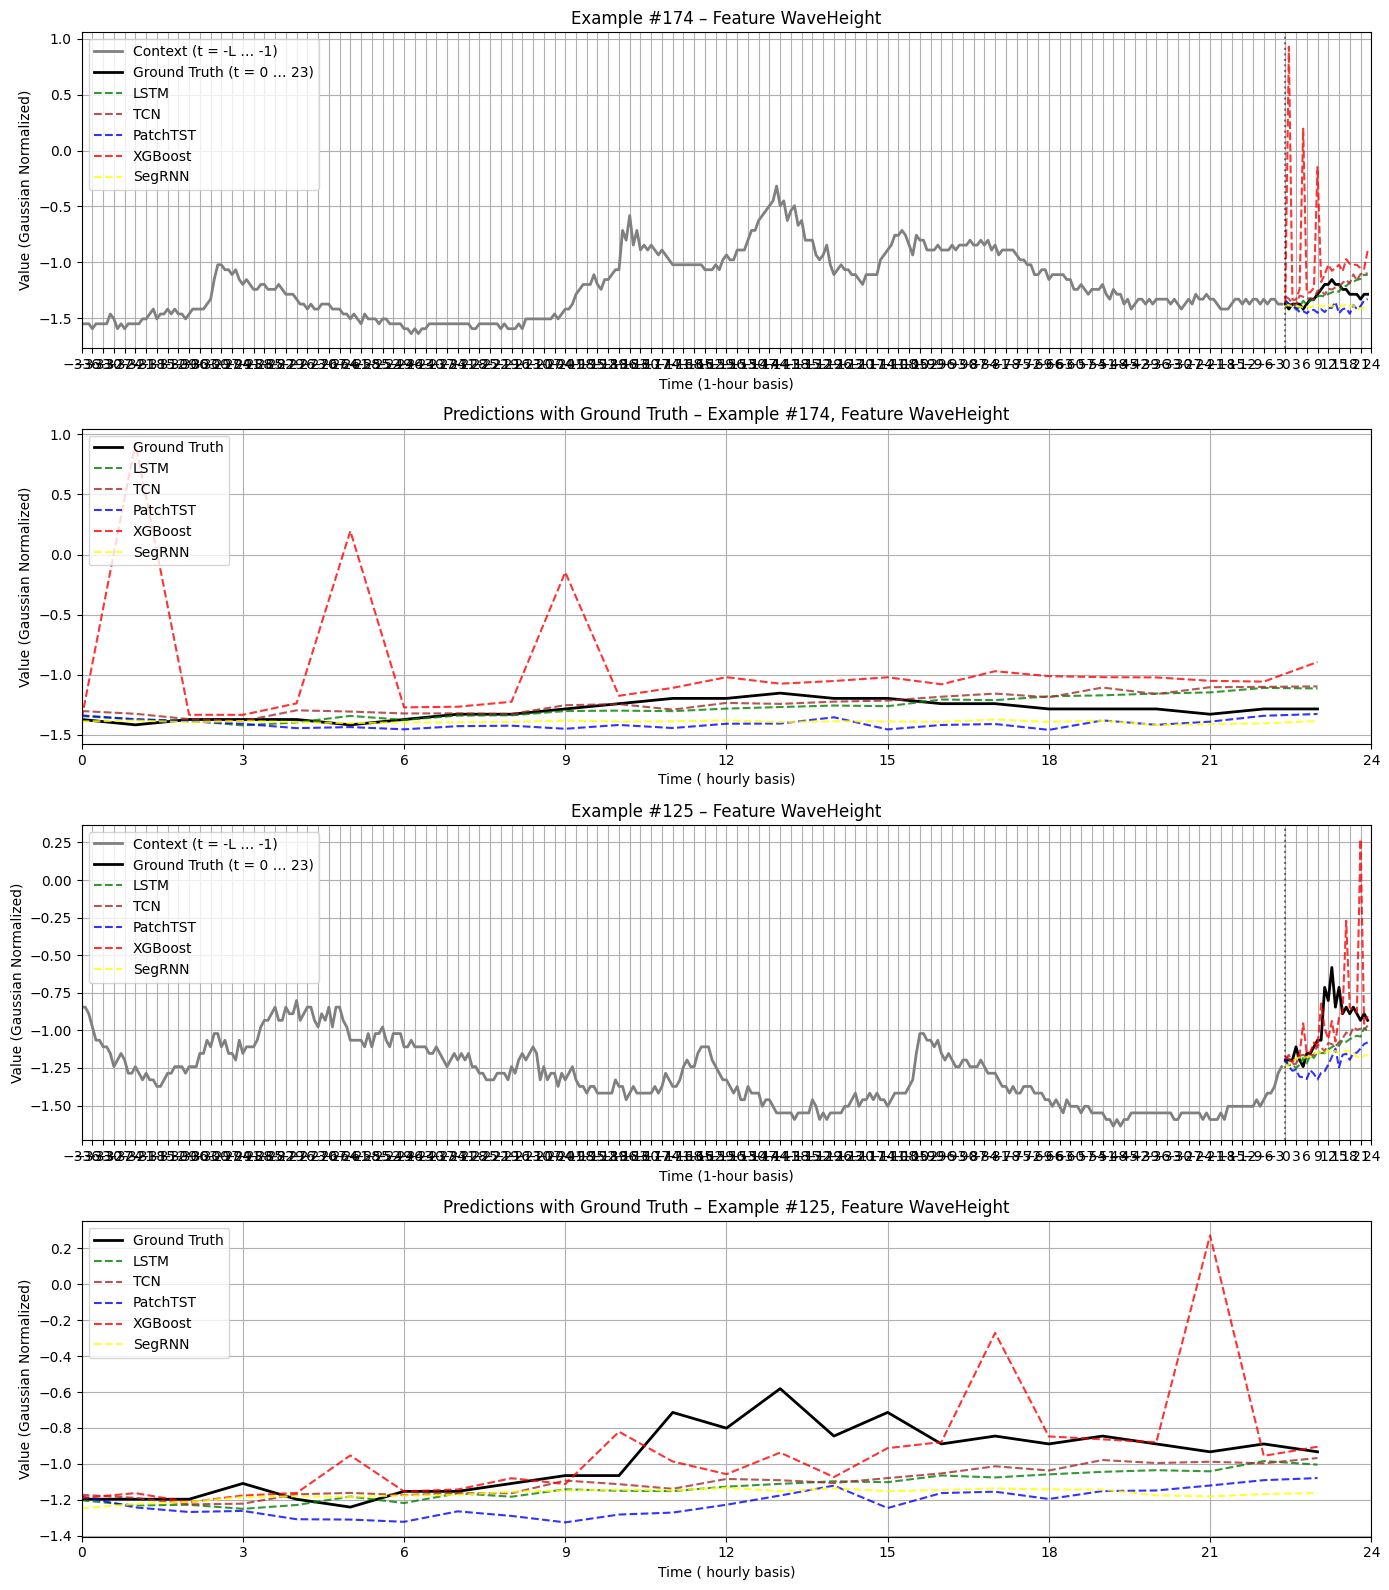

In [ ]:
preds = {}
types = {}
params = {}
times = {}
colors = {}

if drop_columns :
  type_model = "univariate"
else :
  type_model = "multivariate"

if LSTM_Train:
    preds["LSTM"] = y_pred_lstm
    types["LSTM"] = "univariate"
    params["LSTM"] = lstm_num_params
    times["LSTM"] = lstm_training_time
    colors["LSTM"] = "green"

if TCN_Train:
    preds["TCN"] = y_pred_tcn
    types["TCN"] = "univariate"
    params["TCN"] = tcn_num_params
    times["TCN"] = tcn_training_time
    colors["TCN"] = "brown"

if PatchTST_Train:
    preds["PatchTST"] = Y_pred_PatchTST
    types["PatchTST"] = type_model
    params["PatchTST"] = PatchTST_num_params
    times["PatchTST"] = PatchTST_training_time
    colors["PatchTST"] = "blue"

if EncoderOnlyTST_Train:
    preds["EncoderOnlyTST"] = Y_pred_encoder
    types["EncoderOnlyTST"] = type_model
    params["EncoderOnlyTST"] = EncoderOnlyTST_num_params
    times["EncoderOnlyTST"] = EncoderOnlyTST_training_time
    colors["EncoderOnlyTST"] = "cyan"

if XGBoost_Train:
    preds["XGBoost"] = y_pred_xgb
    types["XGBoost"] = "univariate"
    params["XGBoost"] = 100
    times["XGBoost"] = xgboost_training_time
    colors["XGBoost"] = "red"

if PatchTSTSelfRep_Train:
    preds["PatchTSTSelfRep"] = Y_pred_PatchTSTSelfRep
    types["PatchTSTSelfRep"] = type_model
    params["PatchTSTSelfRep"] = PatchTSTSelfRep_num_params
    times["PatchTSTSelfRep"] = PatchTSTSelfRep_training_time
    colors["PatchTSTSelfRep"] = "purple"

if SegRNN_Train:
    preds["SegRNN"] = Y_pred_SegRNN
    types["SegRNN"] = type_model
    params["SegRNN"] = SegRNN_num_params
    times["SegRNN"] = SegRNN_training_time
    colors["SegRNN"] = "yellow"


compare_models(
    X_true=X_true_Compare,
    Y_true=Y_true_Compare,
    model_preds=preds,
    target_idx=target_idx,
    model_types=types,
    model_params=params,
    training_times=times,
    model_colors=colors,
    num_windows_to_plot=2
)
